In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

import io

import scipy
from scipy import stats
from scipy.stats import t,norm,chi2,chi2_contingency,chisquare

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pylab
from pylab import plot,show,legend,title,xlabel, ylabel

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error

In [ ]:
# Importing the File 'Application_data'
df = pd.read_csv('/content/drive/MyDrive/Dataset/application_data.csv')

In [ ]:
#Importing the file 'previous_application'
df1 = pd.read_csv('/content/drive/MyDrive/Dataset/previous_application.csv')

In [ ]:
info = pd.read_csv('/content/drive/MyDrive/Dataset/columns_description.csv',encoding = 'latin-1')
#This is column describing Dataset

In [ ]:
info.head()  # displays the top 5 rows

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

# Cleaning Of Data Applicaton_Data

In [ ]:
df.head() # Head to get idea of Dataset , Top 5 Rows

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
df.tail() # last 5 rows of dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [ ]:
df.shape # Rows and Columns of Data

(307511, 122)

In [ ]:
df.columns # Columns of Dataframes

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
df.describe() # Describing of Dataset

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
df[df.duplicated()] # No duplicates rows in This data

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [ ]:
df.isnull().sum().sort_values(ascending = False) # Counting of null values and Sorting According to it

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [ ]:
df.corr() #Calculating The coorelation

<ipython-input-521-f2466d977708>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Calculating The coorelation


SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   
TARGET                         -0.002108  1.000000      0.019187   
CNT_CHILDREN                   -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               -0.001820 -0.003982      0.012882   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
AMT_ANNUITY                    -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE                -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
DAYS_BIRTH                     -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION              -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                     0.001818  0.037612      0.008494   
FLAG_MOBIL                      0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE                0.002815  0.000370     -0.000794   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   
FLAG_EMAIL                      0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS                -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT           -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION     -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION      0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION     0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY         -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY         -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY         0.000067  0.032518      0.069957   
EXT_SOURCE_1                    0.000082 -0.155317     -0.138470   
EXT_SOURCE_2                    0.002342 -0.160472     -0.018015   
EXT_SOURCE_3                    0.000222 -0.178919     -0.042710   
APARTMENTS_AVG                  0.001556 -0.029498     -0.013222   
BASEMENTAREA_AVG               -0.002070 -0.022746     -0.008464   
YEARS_BEGINEXPLUATATION_AVG     0.001551 -0.009728      0.006902   
YEARS_BUILD_AVG                 0.005900 -0.022149      0.030172   
COMMONAREA_AVG                 -0.001463 -0.018550      0.000140   
ELEVATORS_AVG                   0.004862 -0.034199     -0.007060   
ENTRANCES_AVG                  -0.002879 -0.019172     -0.008341   
FLOORSMAX_AVG                   0.004851 -0.044003     -0.009705   
FLOORSMIN_AVG                   0.003083 -0.033614     -0.008753   
LANDAREA_AVG                    0.001465 -0.010885     -0.003121   
LIVINGAPARTMENTS_AVG            0.003119 -0.025031     -0.008648   
LIVINGAREA_AVG                  0.001770 -0.032997     -0.010116   
NONLIVINGAPARTMENTS_AVG        -0.002575 -0.003176      0.004051   
NONLIVINGAREA_AVG               0.003042 -0.013578      0.000028   
APARTMENTS_MODE                 0.001961 -0.027284     -0.012105   
BASEMENTAREA_MODE              -0.001411 -0.019952     -0.008513   
YEARS_BEGINEXPLUATATION_MODE    0.001890 -0.009036      0.006199   
YEARS_BUILD_MODE                0.005245 -0.022068      0.029549   
COMMONAREA_MODE                -0.001058 -0.016340      0.000440   
ELEVATORS_MODE                  0.005017 -0.032131     -0.006397   
ENTRANCES_MODE                 -0.002844 -0.017387     -0.006880   
FLOORSMAX_MODE                  0.004386 -0.043226     -0.009550   
FLOORSMIN_MODE                  0.002081 -0.032698     -0.008044   
LANDAREA_MODE                   0.001548 -0.010174     -0.002212   
LIVINGAPARTMENTS_MODE           0.003589 -0.023393     -0.007955   
LIVINGAREA_MODE                 0.002156 -0.030685     -0.009517   
NONLIVINGAPARTMENT

In [ ]:
nv = (df.isnull().sum()/len(df))*100 # Calculating the % of null values in this

In [ ]:
nv=nv[nv>35] # Getting the % of null values in columns

In [ ]:
nv = list(nv[nv.values>=35.0].index)
df_cln = df.drop(labels=nv,axis=1)
# Columns are dropped who have null values more than 35%

In [ ]:
kk = (df_cln.isnull().sum()/len(df_cln))*100
kk[kk>35]
#There is no column left now how have Error > 35%

Series([], dtype: float64)

In [ ]:
df_cln.shape # shape of the dataframe

(307511, 73)

## Lets start with application dataframe(df)

Here we are checking the null values in the every column and fill it with the mean or median if the data is if the data is quantitative then we fill the null values with median and if the data is categorical then we feel the values the values with mode , We also remote outliers if there is any outliers in a particular column

In [ ]:
df_cln.CODE_GENDER.unique() # These are the Unnique Values in gender column

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
df_cln.CODE_GENDER.value_counts()
# Count the Data in Columns as it is categorial data
# 'XNA' are only 4 , so we remove it

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# We have removed the XNA values here , As It is not required
df_cln.drop(df_cln[df_cln.CODE_GENDER=='XNA'].index , inplace = True)

In [ ]:
df_cln.CODE_GENDER.value_counts() # Checking again
# here we droped

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df_cln.FLAG_OWN_CAR.value_counts() # count of unique values present in a column

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
df_cln.NAME_CONTRACT_TYPE.value_counts() # count of unique values present in a column

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
df_cln.FLAG_OWN_REALTY.value_counts() # count of unique values present in a column

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
df_cln.CNT_CHILDREN.describe() # Describing Of Data

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

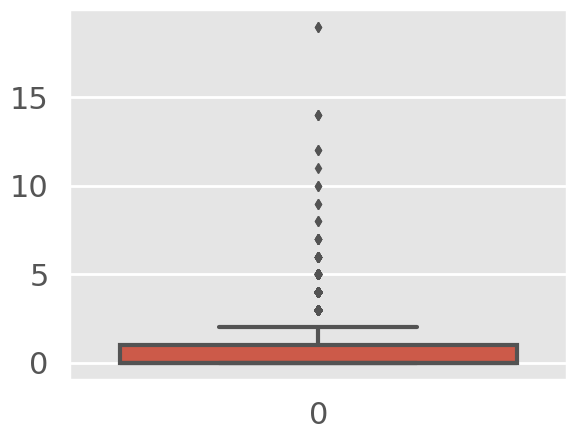

In [ ]:
sns.boxplot(df_cln.CNT_CHILDREN) # made to check for an outliner

In [ ]:
df_cln.AMT_INCOME_TOTAL.describe() # Describing the coloumns

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

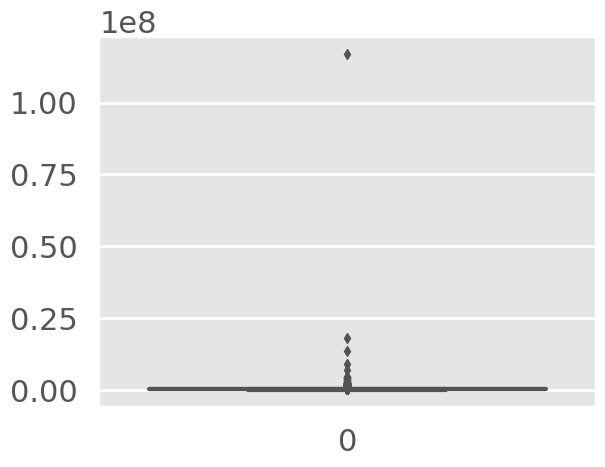

In [ ]:
sns.boxplot(df_cln.AMT_INCOME_TOTAL) # Box plot to get outliner

In [ ]:
len(df_cln[df_cln.AMT_INCOME_TOTAL>25000000]) # Calculating the number of outliner
# This is used to show the outliers in a particular column

1

In [ ]:
df_cln=df_cln[df_cln.AMT_INCOME_TOTAL<25000000] # Dropping the Outliner
# Here we have removed outliers in a in this column

<Axes: >

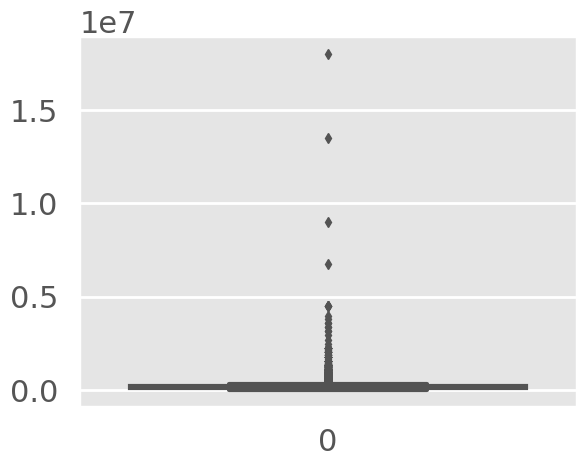

In [ ]:
sns.boxplot(df_cln.AMT_INCOME_TOTAL) # Making the boxplot to get outliner

In [ ]:
df_cln.AMT_INCOME_TOTAL.dtype # Just checking the datatype

dtype('float64')

In [ ]:
df_cln.AMT_CREDIT.describe() # Describing the datatype

count    3.075060e+05
mean     5.990287e+05
std      4.024933e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: >

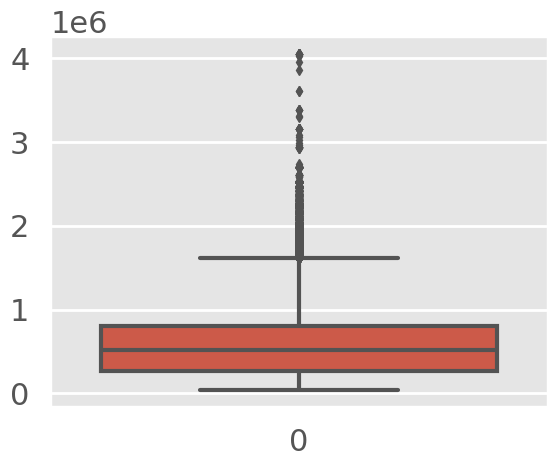

In [ ]:
sns.boxplot(df_cln.AMT_CREDIT) # Ploting the Boxplot to check Outliner

In [ ]:
df_cln.AMT_ANNUITY.describe() # Describing the columns

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: >

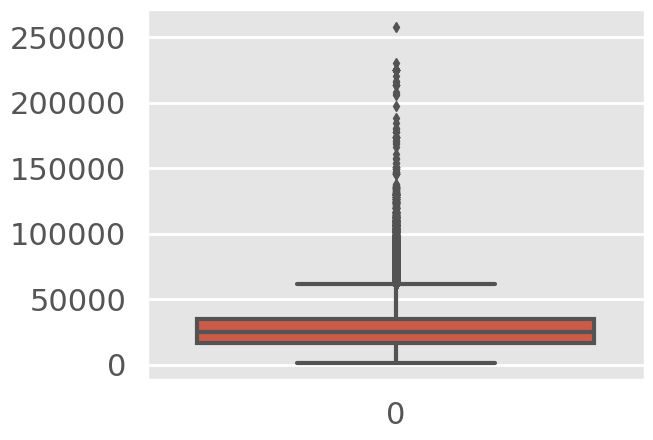

In [ ]:
sns.boxplot(df_cln.AMT_ANNUITY) # boxplot for outliner

In [ ]:
df_cln.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
df_cln.AMT_ANNUITY.describe() # Describing the Data

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df_cln.AMT_ANNUITY.isnull().sum() # calulating the null value in this

12

# Filling the missing values with the median

In this we are filling on our values with median and mode if the column contains quantitative data then we feel null values with median and if the condom contains categorial data then we fill the lnull values by mode

In [ ]:
df_cln.AMT_ANNUITY=df_cln.AMT_ANNUITY.fillna(df_cln.AMT_ANNUITY.median()) # Replacing the NULL values with median of Column Data

In [ ]:
# Null Values are removed
df_cln.AMT_ANNUITY.isnull().sum()
# Here we have filled all the null values with median in upper command

0

<Axes: >

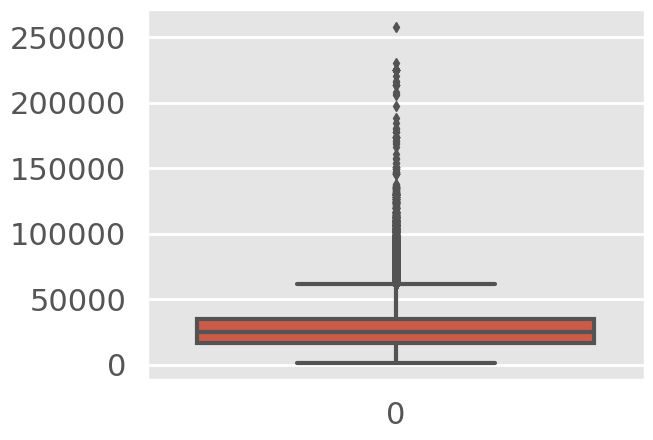

In [ ]:
sns.boxplot(df_cln.AMT_ANNUITY)
# This is a box plot which we have made to find outliers in this column

In [ ]:
df_cln['AMT_GOODS_PRICE'].describe() # Describing , Data is Quantitative
# This states that the data is quantitative in this column

count    3.072280e+05
mean     5.383980e+05
std      3.694478e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: ylabel='AMT_GOODS_PRICE'>

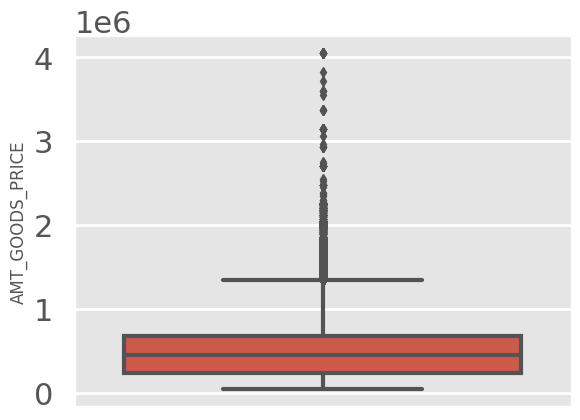

In [ ]:
sns.boxplot(y=df_cln['AMT_GOODS_PRICE']) # To check for outliber

In [ ]:
df_cln['AMT_GOODS_PRICE'].isnull().sum() # sum of Null values

278

In [ ]:
len(df_cln[df_cln['AMT_GOODS_PRICE'].isnull()])/len(df_cln)*100

0.09040474007011245

In [ ]:
df_cln['AMT_GOODS_PRICE'].median() # Here we have calculating the median to fill out null values in this column

450000.0

As our data may contain outliers we have to fill the missing values with median

In [ ]:
df_cln['AMT_GOODS_PRICE']=df_cln['AMT_GOODS_PRICE'].fillna(df_cln['AMT_GOODS_PRICE'].median()) # filling null values with median

In [ ]:
df_cln['AMT_GOODS_PRICE'].isnull().sum() # checking for null values

0

In [ ]:
df_cln.NAME_TYPE_SUITE.value_counts() # count unique values

Unaccompanied      248522
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df_cln.NAME_TYPE_SUITE.isnull().sum() # sum of null valse

1292

In [ ]:
df_cln['NAME_TYPE_SUITE'].mode() # MODE of this Column to fill

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
# As this is a catergorical variable we will use mode to fill the missing values

df_cln.NAME_TYPE_SUITE = df_cln.NAME_TYPE_SUITE.fillna(df_cln.NAME_TYPE_SUITE.mode()[0])

#This calculates the mode of the 'NAME_TYPE_SUITE' column and selects the first element of the resulting mode Series.
# If there are multiple modes, this will select the first one encountered.

In [ ]:
df_cln.NAME_TYPE_SUITE.isnull().sum()# Sum of null values

0

In [ ]:
df_cln.NAME_INCOME_TYPE.value_counts() # count of unique values present in a column

Working                 158770
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
df_cln.NAME_EDUCATION_TYPE.value_counts() # count of unique values present in a column

Secondary / secondary special    218388
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
df_cln.NAME_FAMILY_STATUS.value_counts() # count of unique values present in a column

Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
df_cln.NAME_HOUSING_TYPE.value_counts() # count of unique values present in a column

House / apartment      272864
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
df_cln.REGION_POPULATION_RELATIVE.dtype # Displays data type for the Column

dtype('float64')

In [ ]:
df_cln.REGION_POPULATION_RELATIVE.describe() # describe the table

count    307506.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Axes: ylabel='REGION_POPULATION_RELATIVE'>

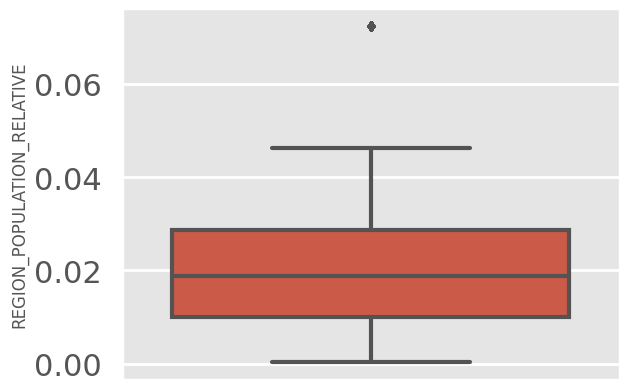

In [ ]:
sns.boxplot(y = df_cln['REGION_POPULATION_RELATIVE']) # Box plots

In [ ]:
df_cln.DAYS_BIRTH.dtype # data types dispaly

dtype('int64')

In [ ]:
df_cln.DAYS_BIRTH.describe()
# as we can see there are negative values in it we have to convert them into the positive

count    307506.000000
mean     -16037.038399
std        4363.985156
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
#Convert it into +ve Values
# As per above description of this column days of birth become to know that the column contains negative values and day's
# birth can't be negative so we convert it into a positive so we are using a following command here
df_cln['DAYS_BIRTH'] = abs(df_cln['DAYS_BIRTH'])

In [ ]:
df_cln.DAYS_BIRTH.describe() # We are using this command to describe the table

count    307506.000000
mean      16037.038399
std        4363.985156
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<Axes: ylabel='DAYS_BIRTH'>

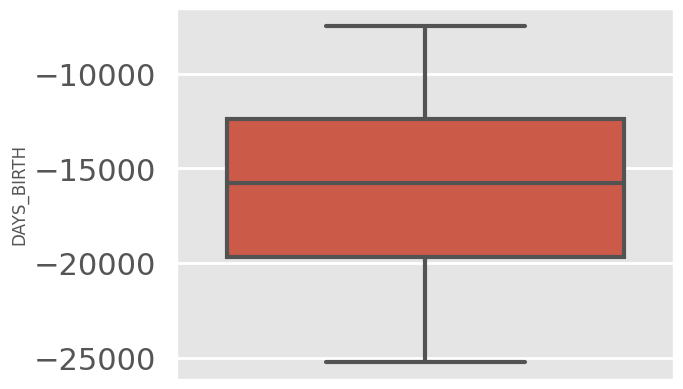

In [ ]:
sns.boxplot(y = df['DAYS_BIRTH']) # Box plot

In [ ]:
df_cln.DAYS_EMPLOYED.describe() # As data is quantative

count    307506.000000
mean      63816.139734
std      141276.653998
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
df_cln['DAYS_EMPLOYED'] = abs(df_cln['DAYS_EMPLOYED']) # As this contains - ve data of convert it to positive

<Axes: >

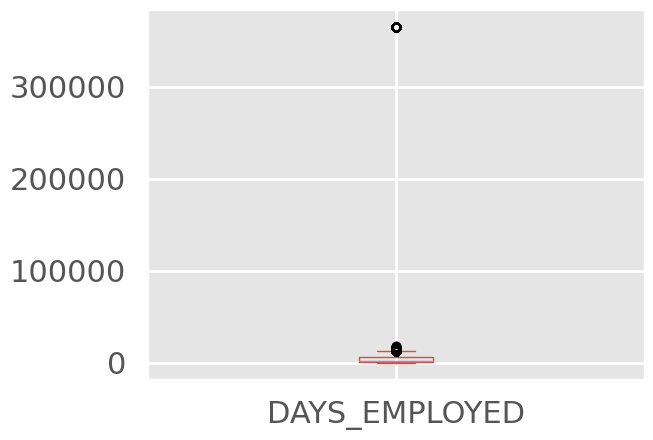

In [ ]:
df_cln.DAYS_EMPLOYED.plot.box() # Box plot

In [ ]:
df_cln.DAYS_EMPLOYED.isnull().sum() # summing the NULL values

0

<Axes: >

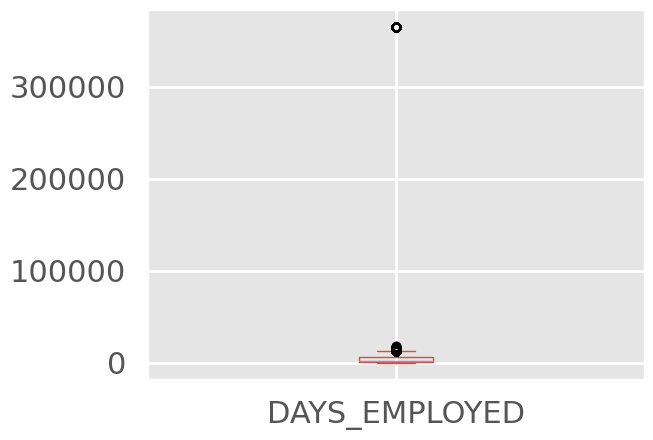

In [ ]:
df_cln.DAYS_EMPLOYED.plot.box() # Boxplot

In [ ]:
df_cln.DAYS_EMPLOYED.isnull().sum()

0

In [ ]:
df_cln.DAYS_REGISTRATION.describe() # Describe the Coulms

count    307506.000000
mean      -4986.125601
std        3522.887303
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
#To make +ve
df_cln['DAYS_REGISTRATION'] = abs(df_cln['DAYS_REGISTRATION']) # Converting to + ve

<Axes: ylabel='DAYS_REGISTRATION'>

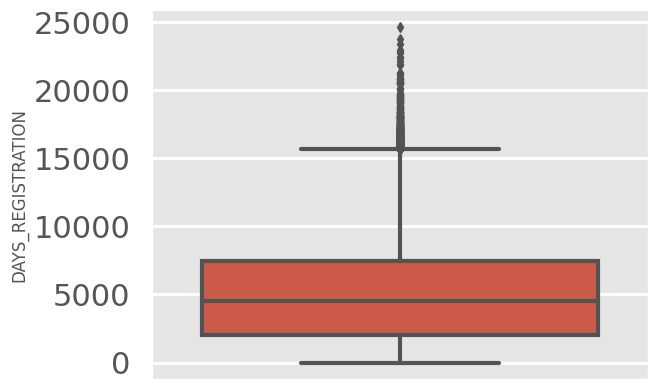

In [ ]:
sns.boxplot(y = df_cln['DAYS_REGISTRATION']) # Pllting of box plot

In [ ]:
df_cln.DAYS_REGISTRATION.describe() # Describe the Columns

count    307506.000000
mean       4986.125601
std        3522.887303
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.750000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
df_cln.DAYS_ID_PUBLISH.describe() # Describe the Columns

count    307506.000000
mean      -2994.199560
std        1509.456567
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [ ]:
df_cln['DAYS_ID_PUBLISH']=abs(df_cln['DAYS_ID_PUBLISH']) # Converting to + VE

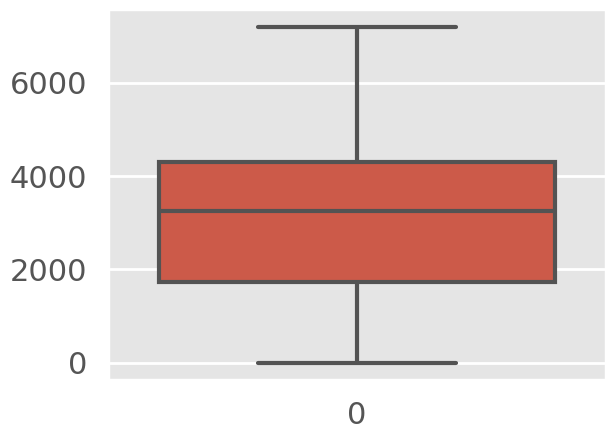

In [ ]:
sns.boxplot(df_cln.DAYS_ID_PUBLISH)
plt.ylabel = 'DAYS_ID_Publish' # This command is used to label the graph box plot

In [ ]:
df_cln.FLAG_MOBIL.value_counts() # Value count in This

1    307505
0         1
Name: FLAG_MOBIL, dtype: int64

In [ ]:
df_cln.FLAG_CONT_MOBILE.value_counts()

1    306932
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

<Axes: >

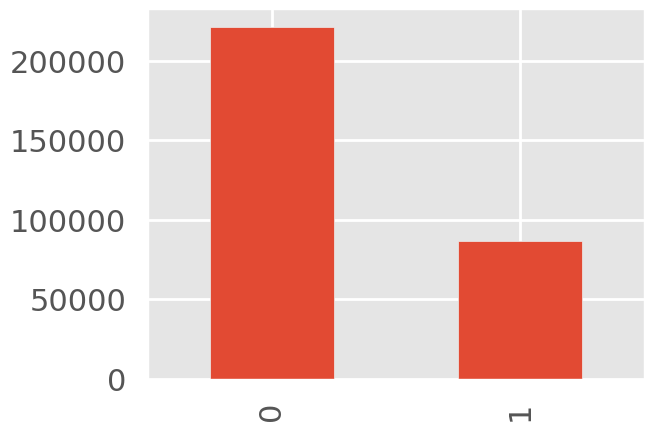

In [ ]:
df_cln.FLAG_PHONE.value_counts().plot.bar()

In [ ]:
df_cln.FLAG_EMAIL.value_counts()

0    290064
1     17442
Name: FLAG_EMAIL, dtype: int64

In [ ]:
df_cln.OCCUPATION_TYPE.value_counts() # Counts unique vales

Laborers                 55185
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<Axes: >

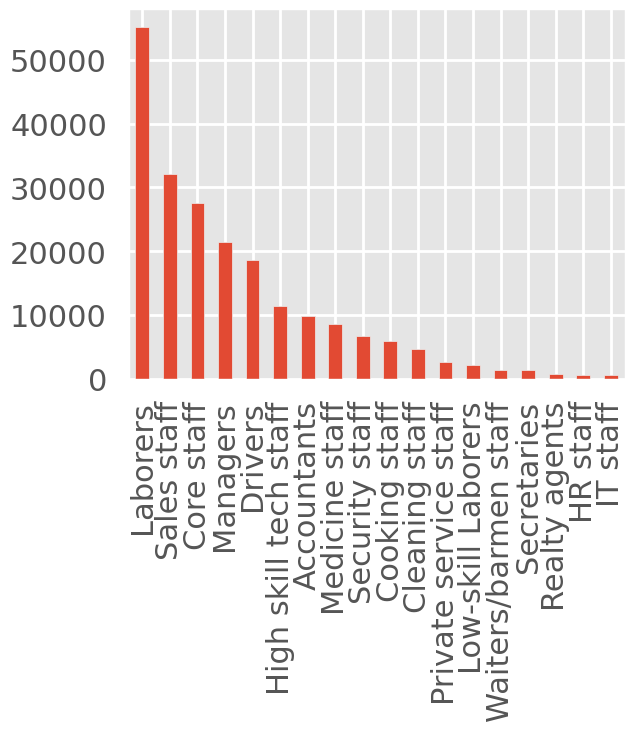

In [ ]:
df_cln.OCCUPATION_TYPE.value_counts().plot.bar()
# Here we can fill the null values in occupation by labor as it is a mode but we are not doing that
#because if we do that it may create a biased in a column so we are feeling the null values using keyword 'unknown'

In [ ]:
df_cln.OCCUPATION_TYPE.isnull().sum()

96389

In [ ]:
df_cln.OCCUPATION_TYPE.fillna('Unknown' , inplace = True)
# As we see labours are the mode but we dont replace it becauase it make data baised so we decided to replace with 'Unknowns'

In [ ]:
df_cln.OCCUPATION_TYPE.isnull().sum() #Here the account of null values is zero as we have filled all the null values using a keyword unknown

0

In [ ]:
df_cln.CNT_FAM_MEMBERS.describe()

count    307504.000000
mean          2.152655
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<Axes: ylabel='CNT_FAM_MEMBERS'>

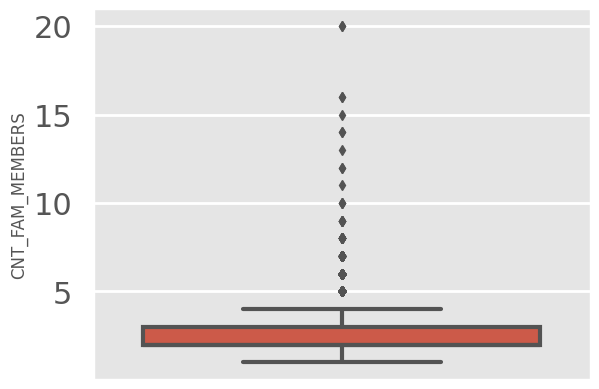

In [ ]:
sns.boxplot(y = df_cln['CNT_FAM_MEMBERS']) # to check outliner

In [ ]:
df_cln.CNT_FAM_MEMBERS.isnull().sum() # cal NULL values

2

In [ ]:
df_cln['CNT_FAM_MEMBERS'].fillna(df_cln.CNT_FAM_MEMBERS.median() , inplace = True) # just now this command fils the null values in this column by the median of the data of the column

In [ ]:
df_cln.CNT_FAM_MEMBERS.isnull().sum()

0

<Axes: >

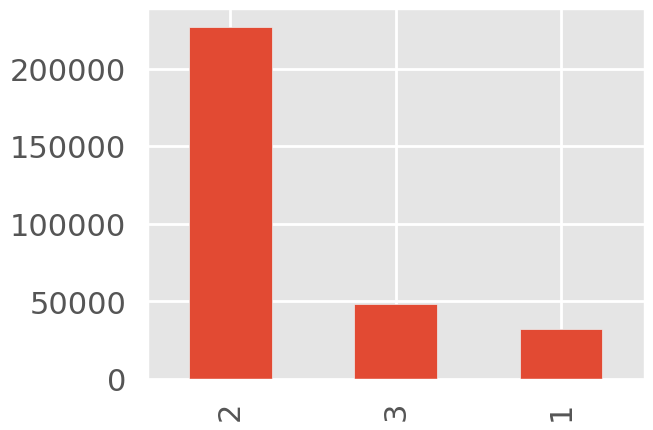

In [ ]:
df_cln.REGION_RATING_CLIENT.value_counts().plot.bar()

<Axes: >

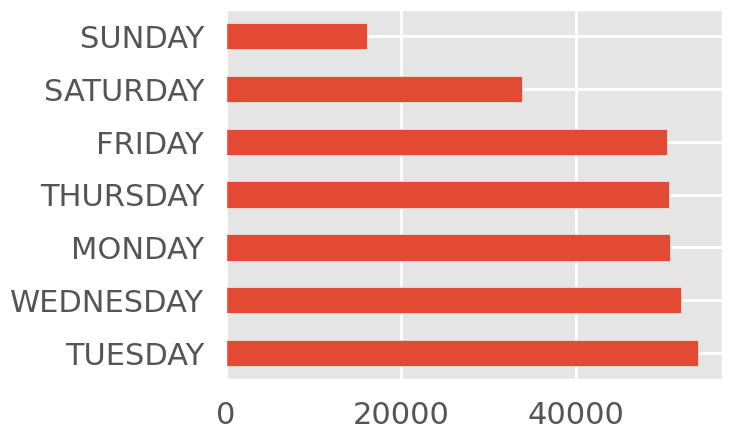

In [ ]:
df_cln.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()

In [ ]:
df_cln.HOUR_APPR_PROCESS_START.value_counts()

10    37721
11    37229
12    34233
13    30959
14    27681
9     27384
15    24837
16    20384
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [ ]:
df_cln.REG_REGION_NOT_LIVE_REGION.value_counts() #count of unique values present in a column

0    302849
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [ ]:
df_cln.REG_REGION_NOT_WORK_REGION.value_counts() #count of unique values present in a column

0    291894
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
df_cln.LIVE_REGION_NOT_WORK_REGION.value_counts() #count of unique values present in a column

0    295003
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
df_cln.REG_CITY_NOT_LIVE_CITY.value_counts() #count of unique values present in a column

0    283467
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [ ]:
df_cln.REG_CITY_NOT_WORK_CITY.value_counts() #count of unique values present in a column

0    236639
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [ ]:
df_cln.ORGANIZATION_TYPE.value_counts() #count of unique values present in a column

Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

# Droping Uwanted Columns

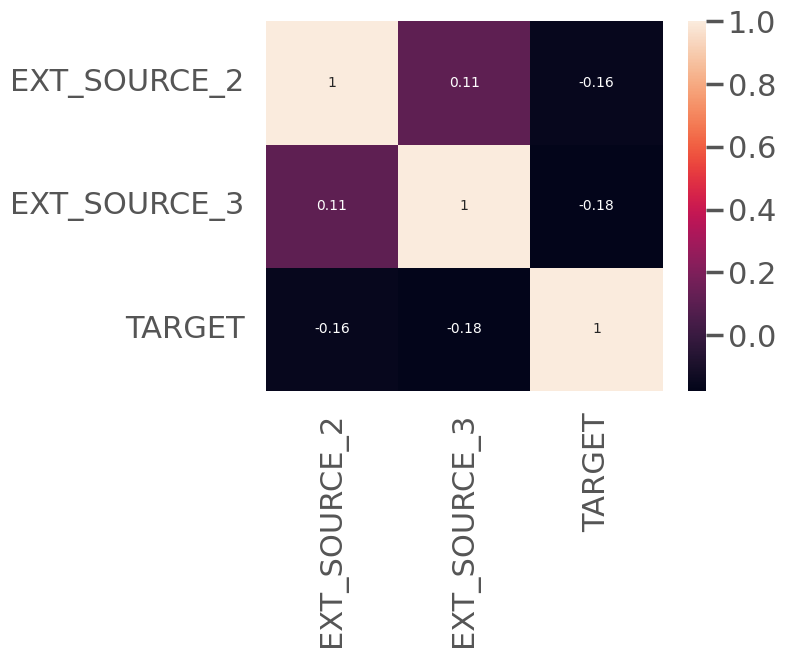

In [ ]:
uc = df_cln[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
uc_crr = uc.corr()
ax = sns.heatmap(uc_crr,
            xticklabels=uc_crr.columns,
            yticklabels=uc_crr.columns,
            annot = True)
# Here we have created a heat map using a command Df.Corr this tells the relation in this columns ,
# By analyzing the correlation in these columns we decide to delete this column from a data set

In [ ]:
# Based on the above Heatmap, we can see there no correlation between EXT_SOURCE_3 / 2 columns and target column,
#thus we can drop these columns

In [ ]:
df_cln.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True) # By analyzing heat map we decide to delete these two Columns

In [ ]:
df_cln.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum() #count of unique values present in a column

1021

In [ ]:
df_cln.OBS_30_CNT_SOCIAL_CIRCLE.describe() # This command describes the table

count    306485.000000
mean          1.422213
std           2.400933
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

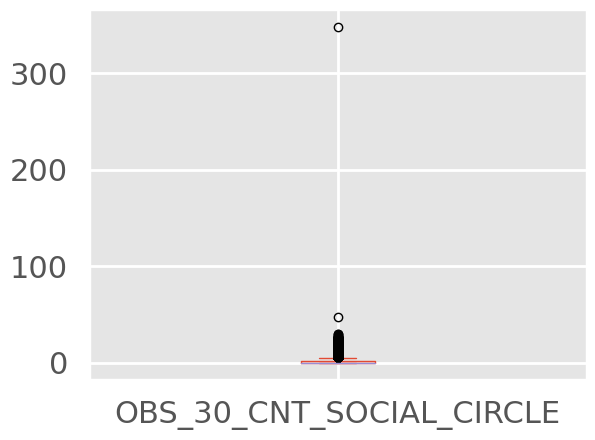

In [ ]:
df_cln.OBS_30_CNT_SOCIAL_CIRCLE.plot.box() # Here we are creating a boxplot of this column to find out outliners in column

In [ ]:
df_cln[df_cln.OBS_30_CNT_SOCIAL_CIRCLE>=60] #This is a Outliner , 60 is taken from graph

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246       10111           1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403             2306.0             2306           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
148403                        1            Police                     348.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
148403                      34.0                     344.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
148403                      24.0                  -667.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
148403                0                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
148403                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
148403                         3.0

In [ ]:
df_cln.drop( df_cln[df_cln.OBS_30_CNT_SOCIAL_CIRCLE>=60].index , axis=0 , inplace = True) # we are dropping outliners

In [ ]:
df_cln.shape

(307505, 71)

<Axes: >

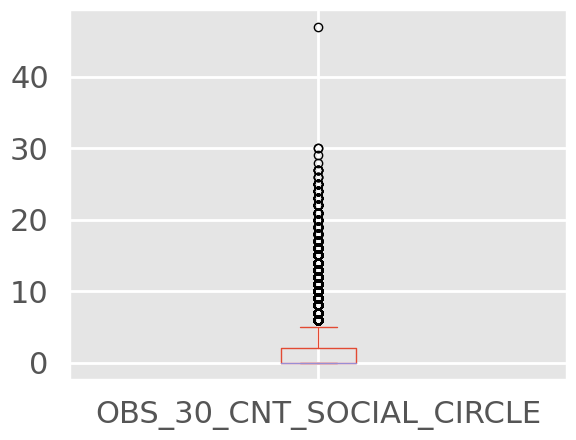

In [ ]:
df_cln.OBS_30_CNT_SOCIAL_CIRCLE.plot.box() #count of unique values present in a column

In [ ]:
df_cln.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306484.000000
mean          1.421082
std           2.317883
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df_cln.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum() # Summing Up Null values in this columns

1021

In [ ]:
df_cln.shape

(307505, 71)

In [ ]:
df_cln.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)

In [ ]:
df_cln.shape # Dis. rows and columns in this dataset

(306484, 71)

In [ ]:
df_cln.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306484.000000
mean          0.143296
std           0.442439
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

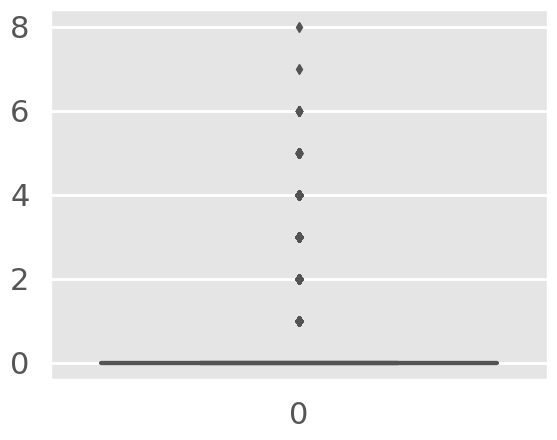

In [ ]:
sns.boxplot(df_cln.DEF_30_CNT_SOCIAL_CIRCLE) # box plot to identify outliers in this column

In [ ]:
# Checking Null values
df_cln.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [ ]:
df_cln.OBS_60_CNT_SOCIAL_CIRCLE.describe() # Describing column

count    306484.000000
mean          1.404142
std           2.297879
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

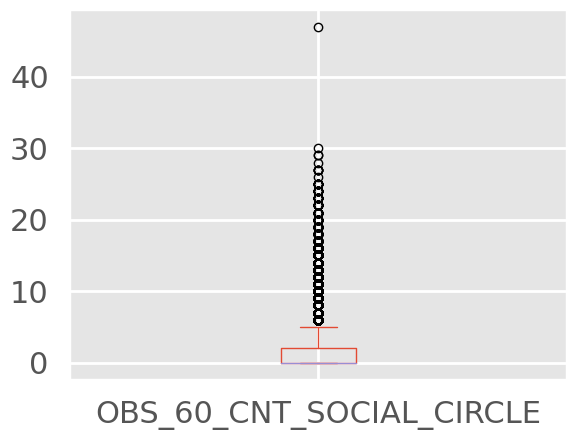

In [ ]:
df_cln.OBS_60_CNT_SOCIAL_CIRCLE.plot.box() # Box Plot to identify Outliner

In [ ]:
df_cln.drop(df_cln[df_cln['OBS_60_CNT_SOCIAL_CIRCLE']>40].index , inplace = True) # Dropping off outliers

In [ ]:
#Check for null values
df_cln.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [ ]:
df_cln.shape

(306483, 71)

In [ ]:
df_cln.DEF_60_CNT_SOCIAL_CIRCLE.describe() # decribing columns

count    306483.000000
mean          0.099957
std           0.359641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

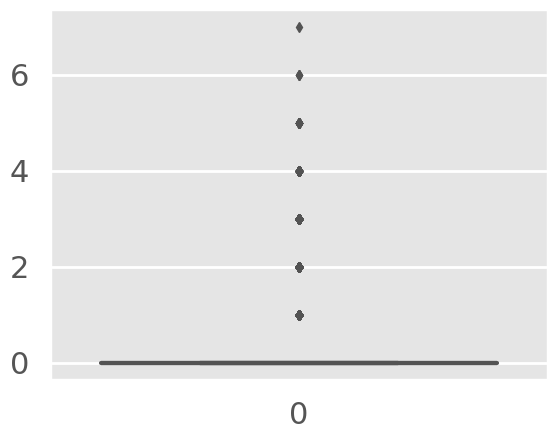

In [ ]:
# BOXPLOT for outliner
sns.boxplot(df_cln.DEF_60_CNT_SOCIAL_CIRCLE)

In [ ]:
df_cln.drop(df_cln[df_cln.DAYS_LAST_PHONE_CHANGE.isnull()].index , inplace = True)

In [ ]:
df_cln.shape

(306482, 71)

In [ ]:
df_cln.DAYS_LAST_PHONE_CHANGE.describe()
# This contains negative values

count    306482.000000
mean       -963.471470
std         826.992961
min       -4292.000000
25%       -1570.000000
50%        -758.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
# In this we convert valus in +ve
df_cln.DAYS_LAST_PHONE_CHANGE=abs(df_cln.DAYS_LAST_PHONE_CHANGE)

In [ ]:
df_cln.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean        963.471470
std         826.992961
min           0.000000
25%         274.000000
50%         758.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
# All value are Positive
df_cln.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean        963.471470
std         826.992961
min           0.000000
25%         274.000000
50%         758.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<Axes: >

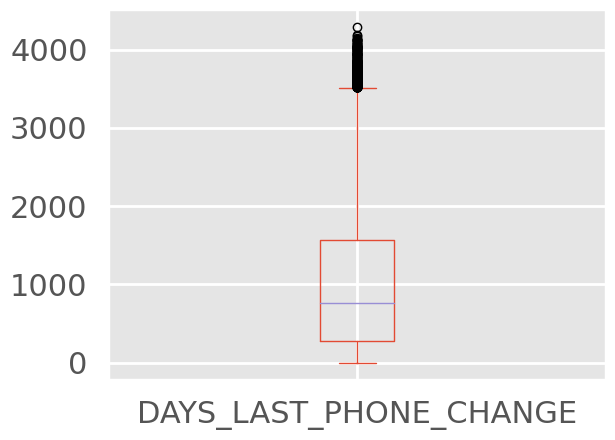

In [ ]:
df_cln.DAYS_LAST_PHONE_CHANGE.plot.box()
# Box plot to identify outliers

# Dropping unwanted columns

In [ ]:
flag = df_cln[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]

<Axes: >

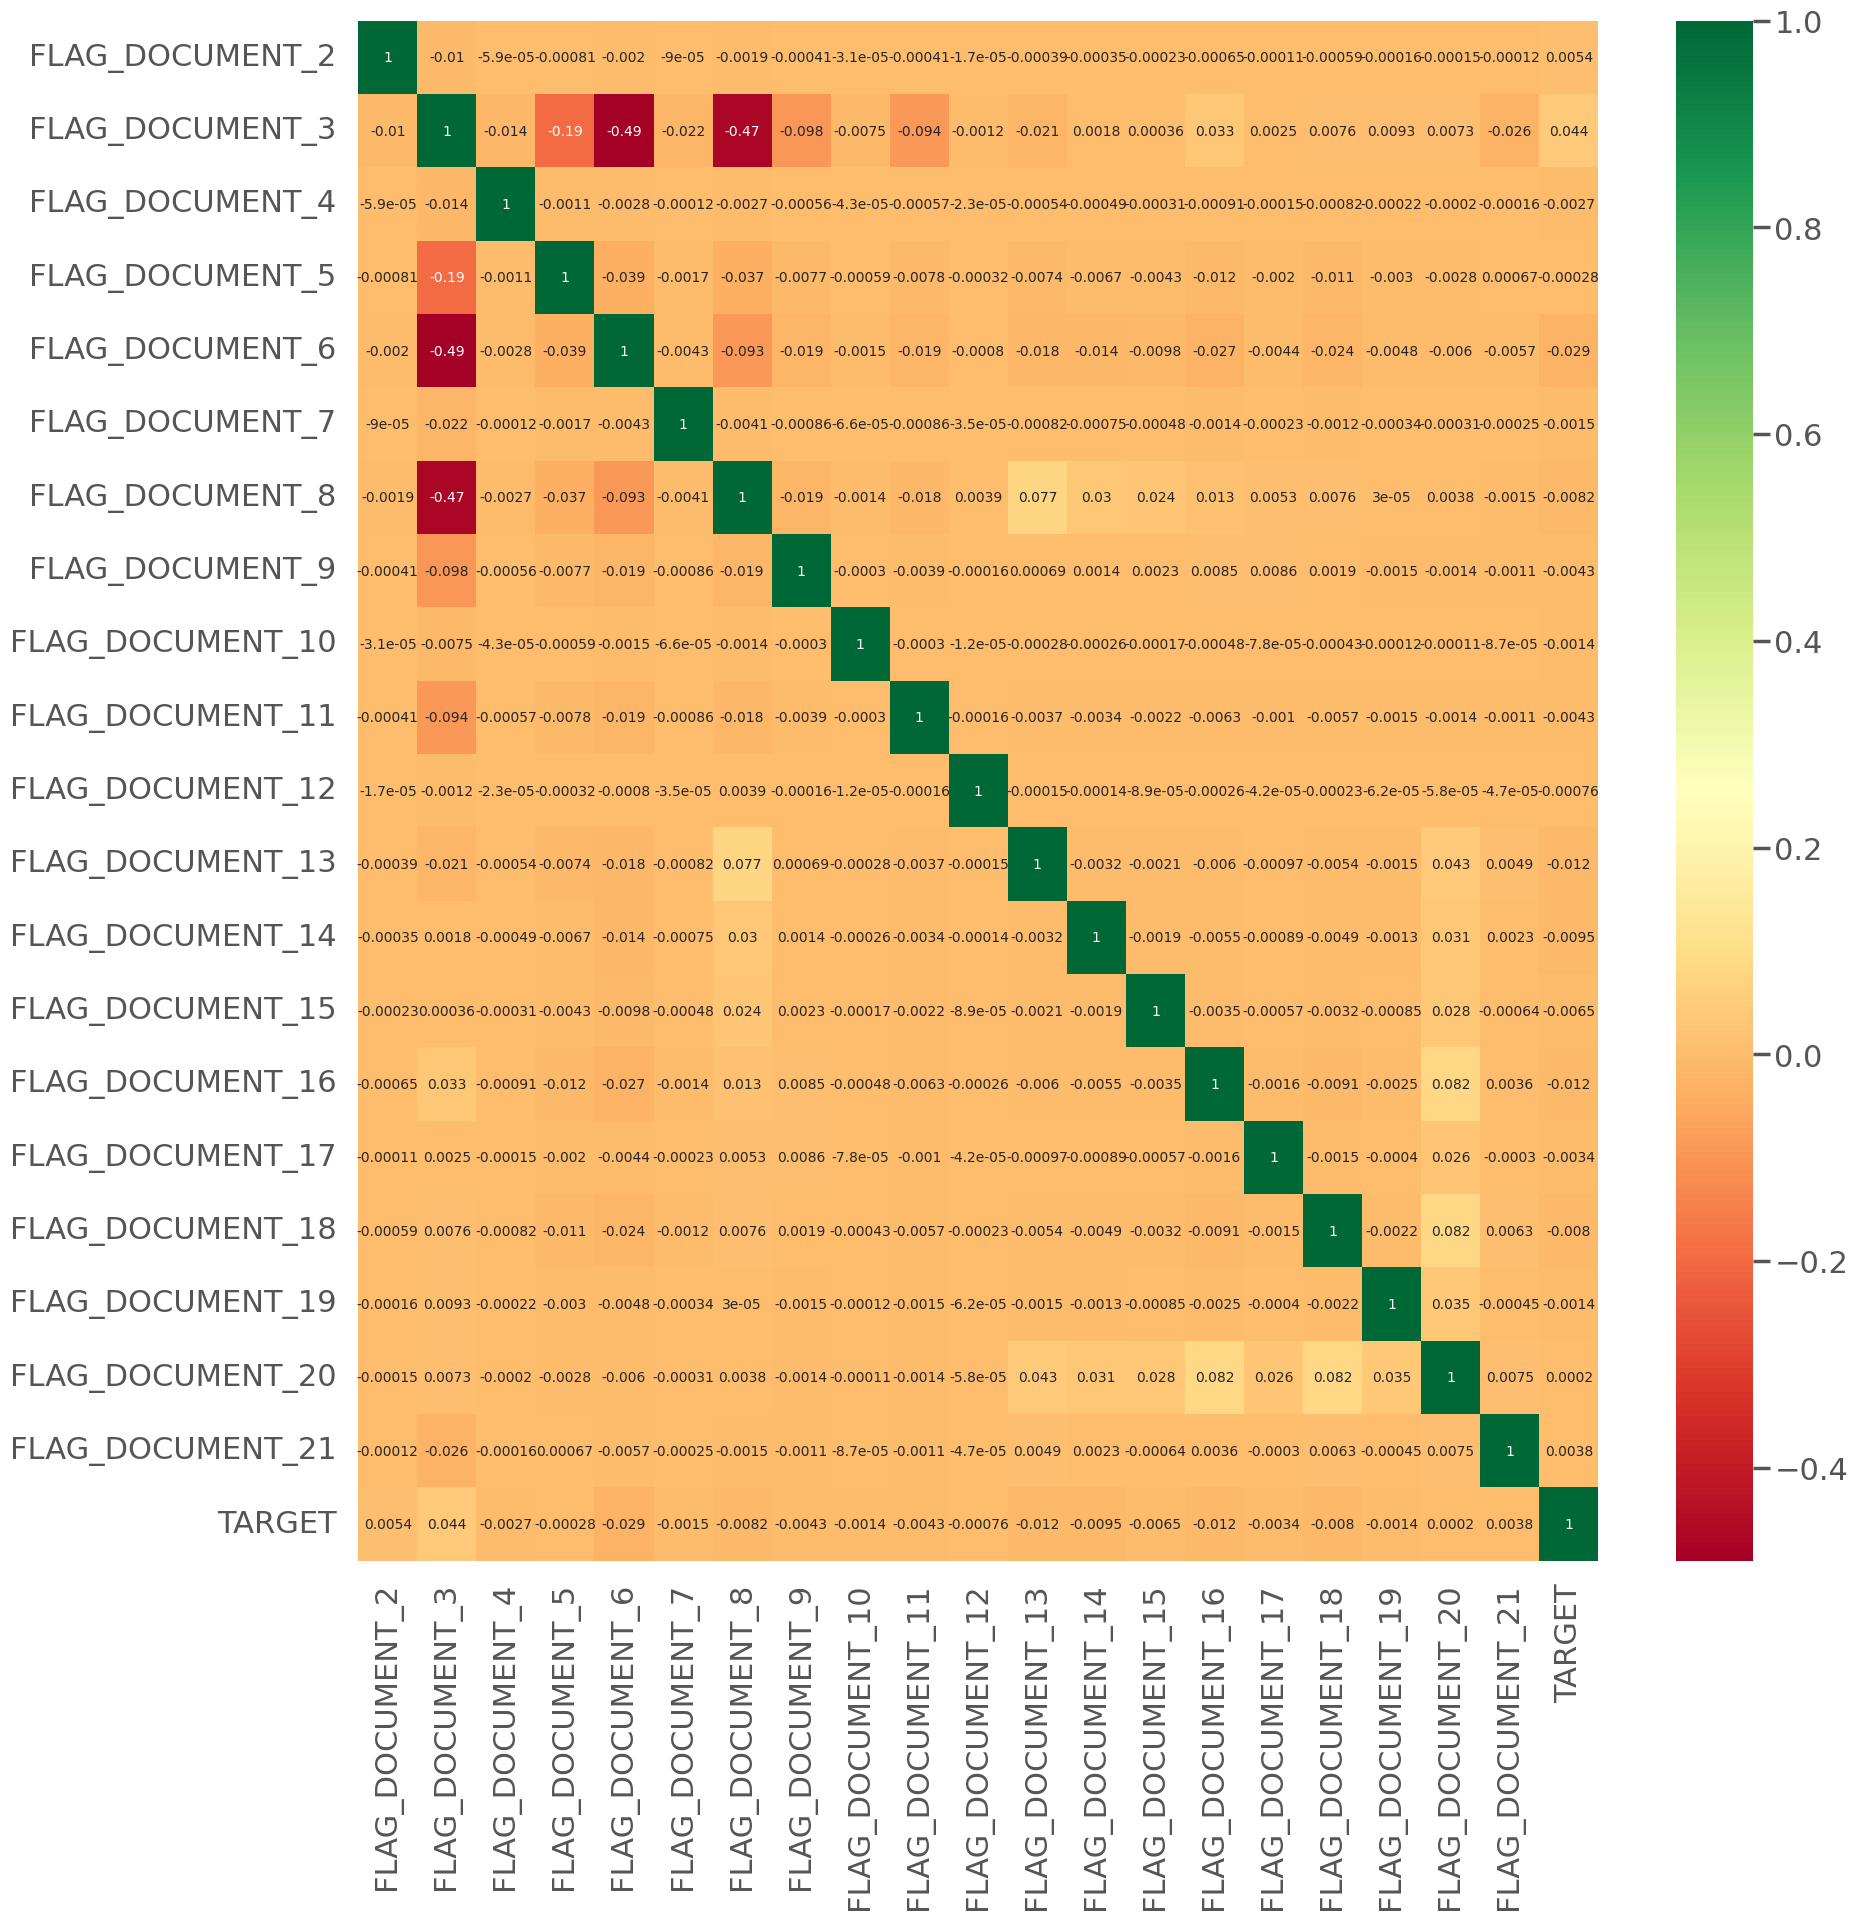

In [ ]:
fig = plt.figure(figsize=(20,20))
flag_corr=flag.corr()
sns.heatmap(flag_corr,
            xticklabels=flag_corr.columns,
            yticklabels=flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
# As we can see there is not much of the correlation betweeen the flag_documents_X and the target varible so we can remove them

In [ ]:
df_cln.iloc[:, 45:65].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [ ]:
df_cln.drop(df_cln.iloc[:, 45:65], inplace=True, axis=1)

In [ ]:
df_cln.shape

(306482, 51)

In [ ]:
#Summing null values
df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41348

In [ ]:
#Filling Null Values by median
df_cln.AMT_REQ_CREDIT_BUREAU_HOUR=df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.median())
# We are filling null values in the column by the median

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    306482.000000
mean          0.005527
std           0.077958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

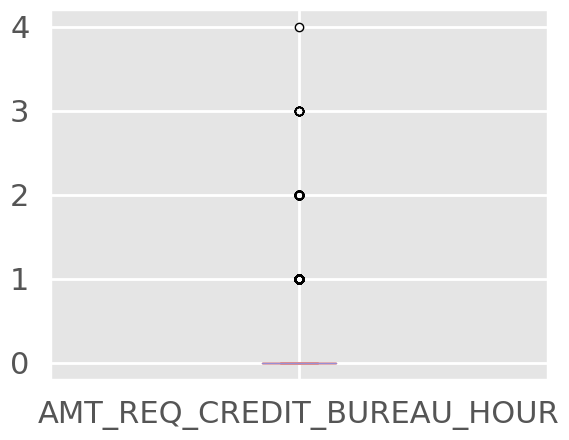

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()

In [ ]:
# Summing Outlier
df_cln.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41348

In [ ]:
# Filling NULL valuesby Mediam
df_cln.AMT_REQ_CREDIT_BUREAU_DAY=df_cln.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_DAY.median())

In [ ]:
# Checking
df_cln.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    306482.000000
mean          0.006072
std           0.103194
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: >

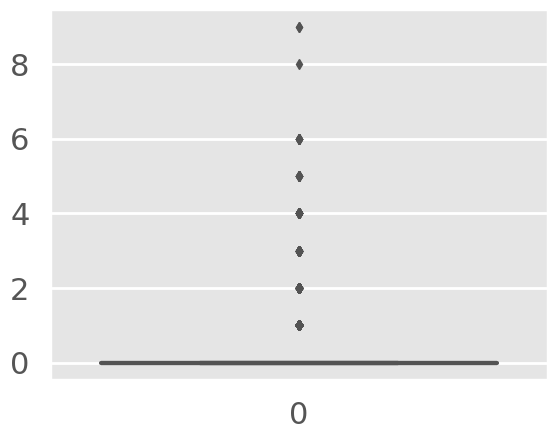

In [ ]:
sns.boxplot(df_cln.AMT_REQ_CREDIT_BUREAU_DAY)

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum() #Summing Null values

41348

In [ ]:
# Filling with median values
df_cln.AMT_REQ_CREDIT_BUREAU_WEEK=df_cln.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_WEEK.median())

In [ ]:
#Checking
df_cln.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_WEEK.describe()
# Decribing

count    306482.000000
mean          0.029767
std           0.190852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: >

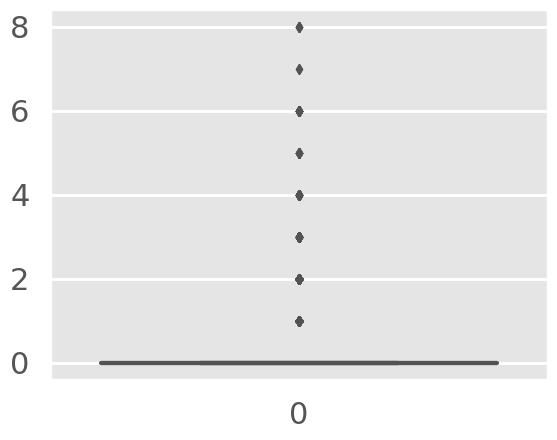

In [ ]:
# To check outliner
sns.boxplot(df_cln.AMT_REQ_CREDIT_BUREAU_WEEK)

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum() # summasion of null values

41348

In [ ]:
# Filling NA to it by mediun
df_cln.AMT_REQ_CREDIT_BUREAU_MON=df_cln.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_MON.median())

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [ ]:
# Describimg table
df_cln.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    306482.000000
mean          0.231341
std           0.856445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: >

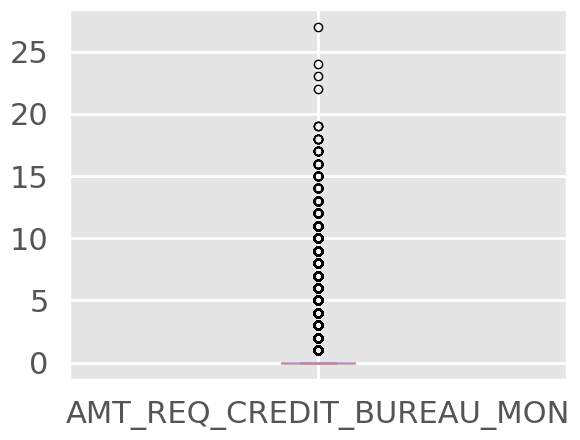

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_MON.plot.box()

In [ ]:
#Removing The Outliner
df_cln=df_cln[df_cln.AMT_REQ_CREDIT_BUREAU_MON<20]

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41348

In [ ]:
# Filling witth medium values
df_cln.AMT_REQ_CREDIT_BUREAU_QRT=df_cln.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_QRT.median())

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_QRT.describe()
# Describing the Columns

count    306478.000000
mean          0.229804
std           0.744554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: >

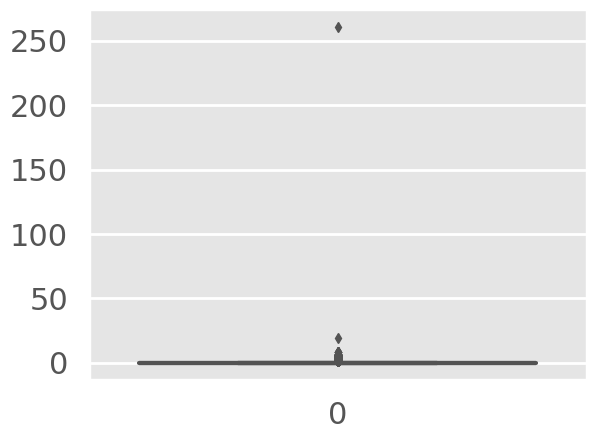

In [ ]:
sns.boxplot(df_cln.AMT_REQ_CREDIT_BUREAU_QRT)
# Box Plot for Outliner

In [ ]:
#Removing OutLiner
df_cln[df_cln.AMT_REQ_CREDIT_BUREAU_QRT>50]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
239474      30393.0        1035000.0   Unaccompanied          Working   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
239474    Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
239474                    0.026392       13590           3336   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
239474             3629.0             3267           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
239474                0                 1           1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
239474     Accountants              3.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
239474                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
239474                       19                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
239474                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
239474                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
239474                        0  Business Entity Type 2   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
239474                   695.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
239474                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
239474                        1.0                      261.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
239474                         0.0

In [ ]:
df_cln=df_cln[df_cln.AMT_REQ_CREDIT_BUREAU_QRT<50] # To remove Outliner inthis Columns

In [ ]:
# Summing NULL values
df_cln.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41348

In [ ]:
# filling with median values
df_cln.AMT_REQ_CREDIT_BUREAU_YEAR=df_cln.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_cln.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    306477.000000
mean          1.779439
std           1.765418
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: >

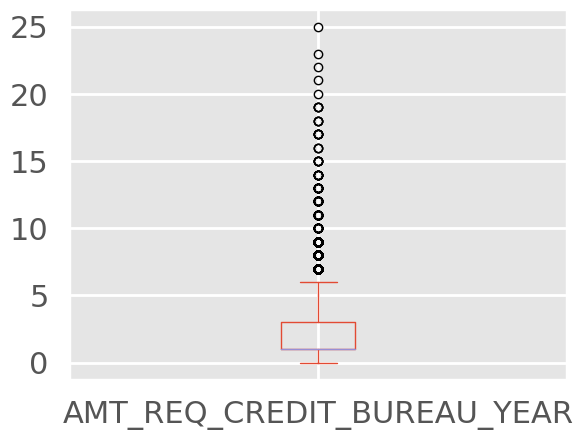

In [ ]:
df_cln.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()

In [ ]:
df_cln.shape

(306477, 51)

In [ ]:
df_cln.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [ ]:
df1.head() # displays the top 5 rows

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
df1.isnull().sum() # sum of null valuse for all columns

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

# Cleaning of Prev Application

In [ ]:
df1.shape

(1670214, 37)

In [ ]:
# Calculating the % of null values in a Cloumns
nv1=df1.isnull().sum()/len(df1)*100
nv1=nv1[nv1>35]
nv1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [ ]:
# Create a list of column namae whose null value % is > 35
nv1 = list(nv1[nv1.values>=35.0].index)
# Performing droping Operation
df1.drop(labels=nv1,axis=1,inplace=True)

In [ ]:
len(nv1)

11

In [ ]:
df1.shape

(1670214, 26)

In [ ]:
# Droping Unneccarsy
df1 = df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1 = df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [ ]:
# Summing null values
df1.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                    263
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

In [ ]:
# Describing Data
df1.AMT_ANNUITY.describe()

count     69372.000000
mean      25682.780030
std       17426.515193
min           0.000000
25%       13595.175000
50%       21368.250000
75%       32681.250000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
# Filling with Mediuam
df1.AMT_ANNUITY=df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median())

<Axes: ylabel='AMT_ANNUITY'>

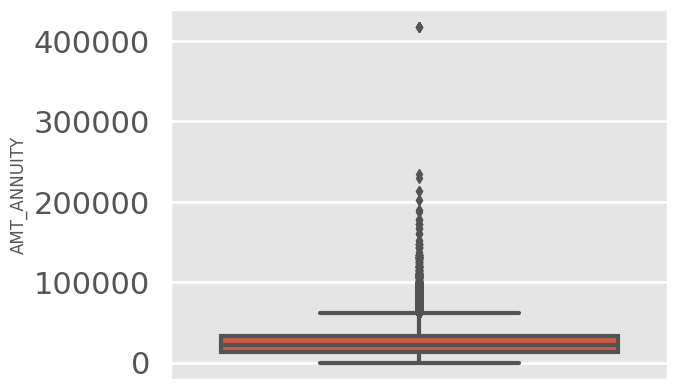

In [ ]:
sns.boxplot(y = df1['AMT_ANNUITY'])

In [ ]:
df1.shape

(69635, 26)

<Axes: ylabel='AMT_ANNUITY'>

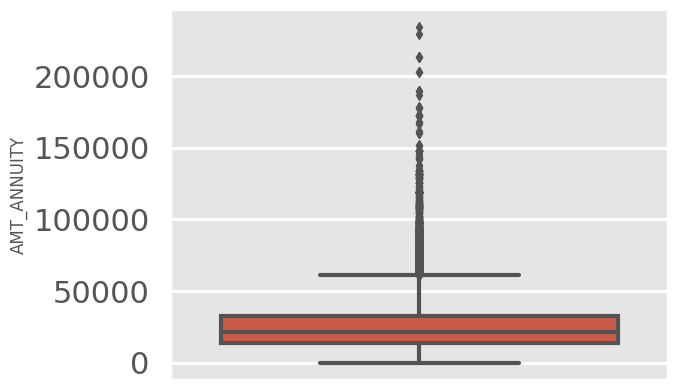

In [ ]:
# Removing Outliner
df1=df1[df1.AMT_ANNUITY<330000]
sns.boxplot(y = df1['AMT_ANNUITY'])

In [ ]:
df1.shape

(69631, 26)

In [ ]:
# Describing Data
df1.AMT_GOODS_PRICE.describe()

count    6.963100e+04
mean     4.532534e+05
std      4.915335e+05
min      0.000000e+00
25%      1.350000e+05
50%      2.700000e+05
75%      6.075000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
# Filling with Mediuam
df1.AMT_GOODS_PRICE=df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.median())

<Axes: ylabel='AMT_GOODS_PRICE'>

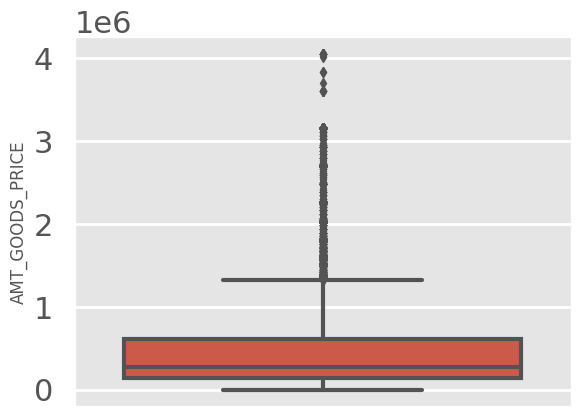

In [ ]:
# Check outliner
sns.boxplot(y = df1['AMT_GOODS_PRICE'])

In [ ]:
df1.shape

(69631, 26)

In [ ]:
df1.shape

(69631, 26)

In [ ]:
df1.AMT_GOODS_PRICE.isnull().sum() # No NuLL values now

0

In [ ]:
# Describing Data
df1.CNT_PAYMENT.describe()

count    69368.000000
mean        29.642213
std         17.666384
min          5.000000
25%         12.000000
50%         24.000000
75%         48.000000
max         60.000000
Name: CNT_PAYMENT, dtype: float64

In [ ]:
# Filling Of NULL values
df1.CNT_PAYMENT = df1.CNT_PAYMENT.fillna(df1.CNT_PAYMENT.median())

In [ ]:
# Check for null
df1.CNT_PAYMENT.isnull().sum()

0

<Axes: ylabel='CNT_PAYMENT'>

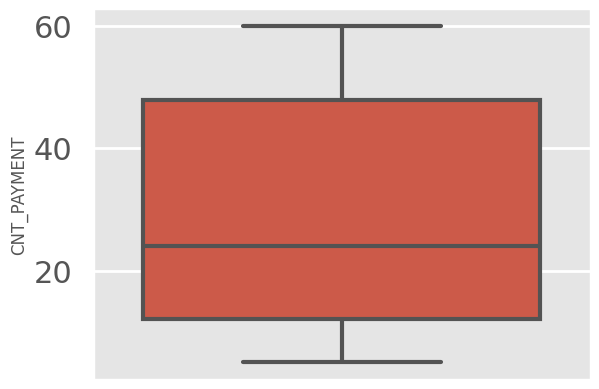

In [ ]:
# Boxplot
sns.boxplot(y = df1['CNT_PAYMENT'])

In [ ]:
#Describing Again
df1.PRODUCT_COMBINATION.describe()

count                 69631
unique                    7
top       Cash Street: high
freq                  28252
Name: PRODUCT_COMBINATION, dtype: object

In [ ]:
df1.PRODUCT_COMBINATION.value_counts() #Gives count of all unique values in the columns

Cash Street: high      28252
Cash Street: low       22320
Cash Street: middle    17616
Cash X-Sell: middle      522
Cash X-Sell: low         462
Cash                     263
Cash X-Sell: high        196
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
df1.PRODUCT_COMBINATION.mode()[0]

'Cash Street: high'

In [ ]:
# Filling NULL with MODE as It is Categorial data
df1.PRODUCT_COMBINATION=df1.PRODUCT_COMBINATION.fillna(df1.PRODUCT_COMBINATION.mode()[0])

In [ ]:
df1.PRODUCT_COMBINATION.isnull().sum() # Checking NULL values

0

In [ ]:
df1.isnull().sum() # Sum of null values

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [ ]:
df_cln.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [ ]:
df1.shape

(69631, 26)

In [ ]:
df_cln.shape

(306477, 51)

# Merging Of 2 DataSet

In [ ]:
# Here we merge the 2 dataset  , we have used inner join here , and used 'SK_ID_CURR'
dfm=pd.merge(left=df_cln,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

<ipython-input-717-6860562c448c>:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  dfm=pd.merge(left=df_cln,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')


In [ ]:
dfm.shape # To check rpws and columns

(59303, 76)

In [ ]:
# here we rename the columns
df_merge = dfm.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
df_cln.shape # After Cleaning Dataset 1

(306477, 51)

In [ ]:
df1.shape # After cleaning Dataset 1

(69631, 26)

In [ ]:
df_merge.CHANNEL_TYPE.value_counts() # Counts the variety of values

Credit and cash offices       42077
AP+ (Cash loan)                7195
Country-wide                   4692
Channel of corporate sales     2765
Contact center                 2364
Stone                           113
Regional / Local                 97
Name: CHANNEL_TYPE, dtype: int64

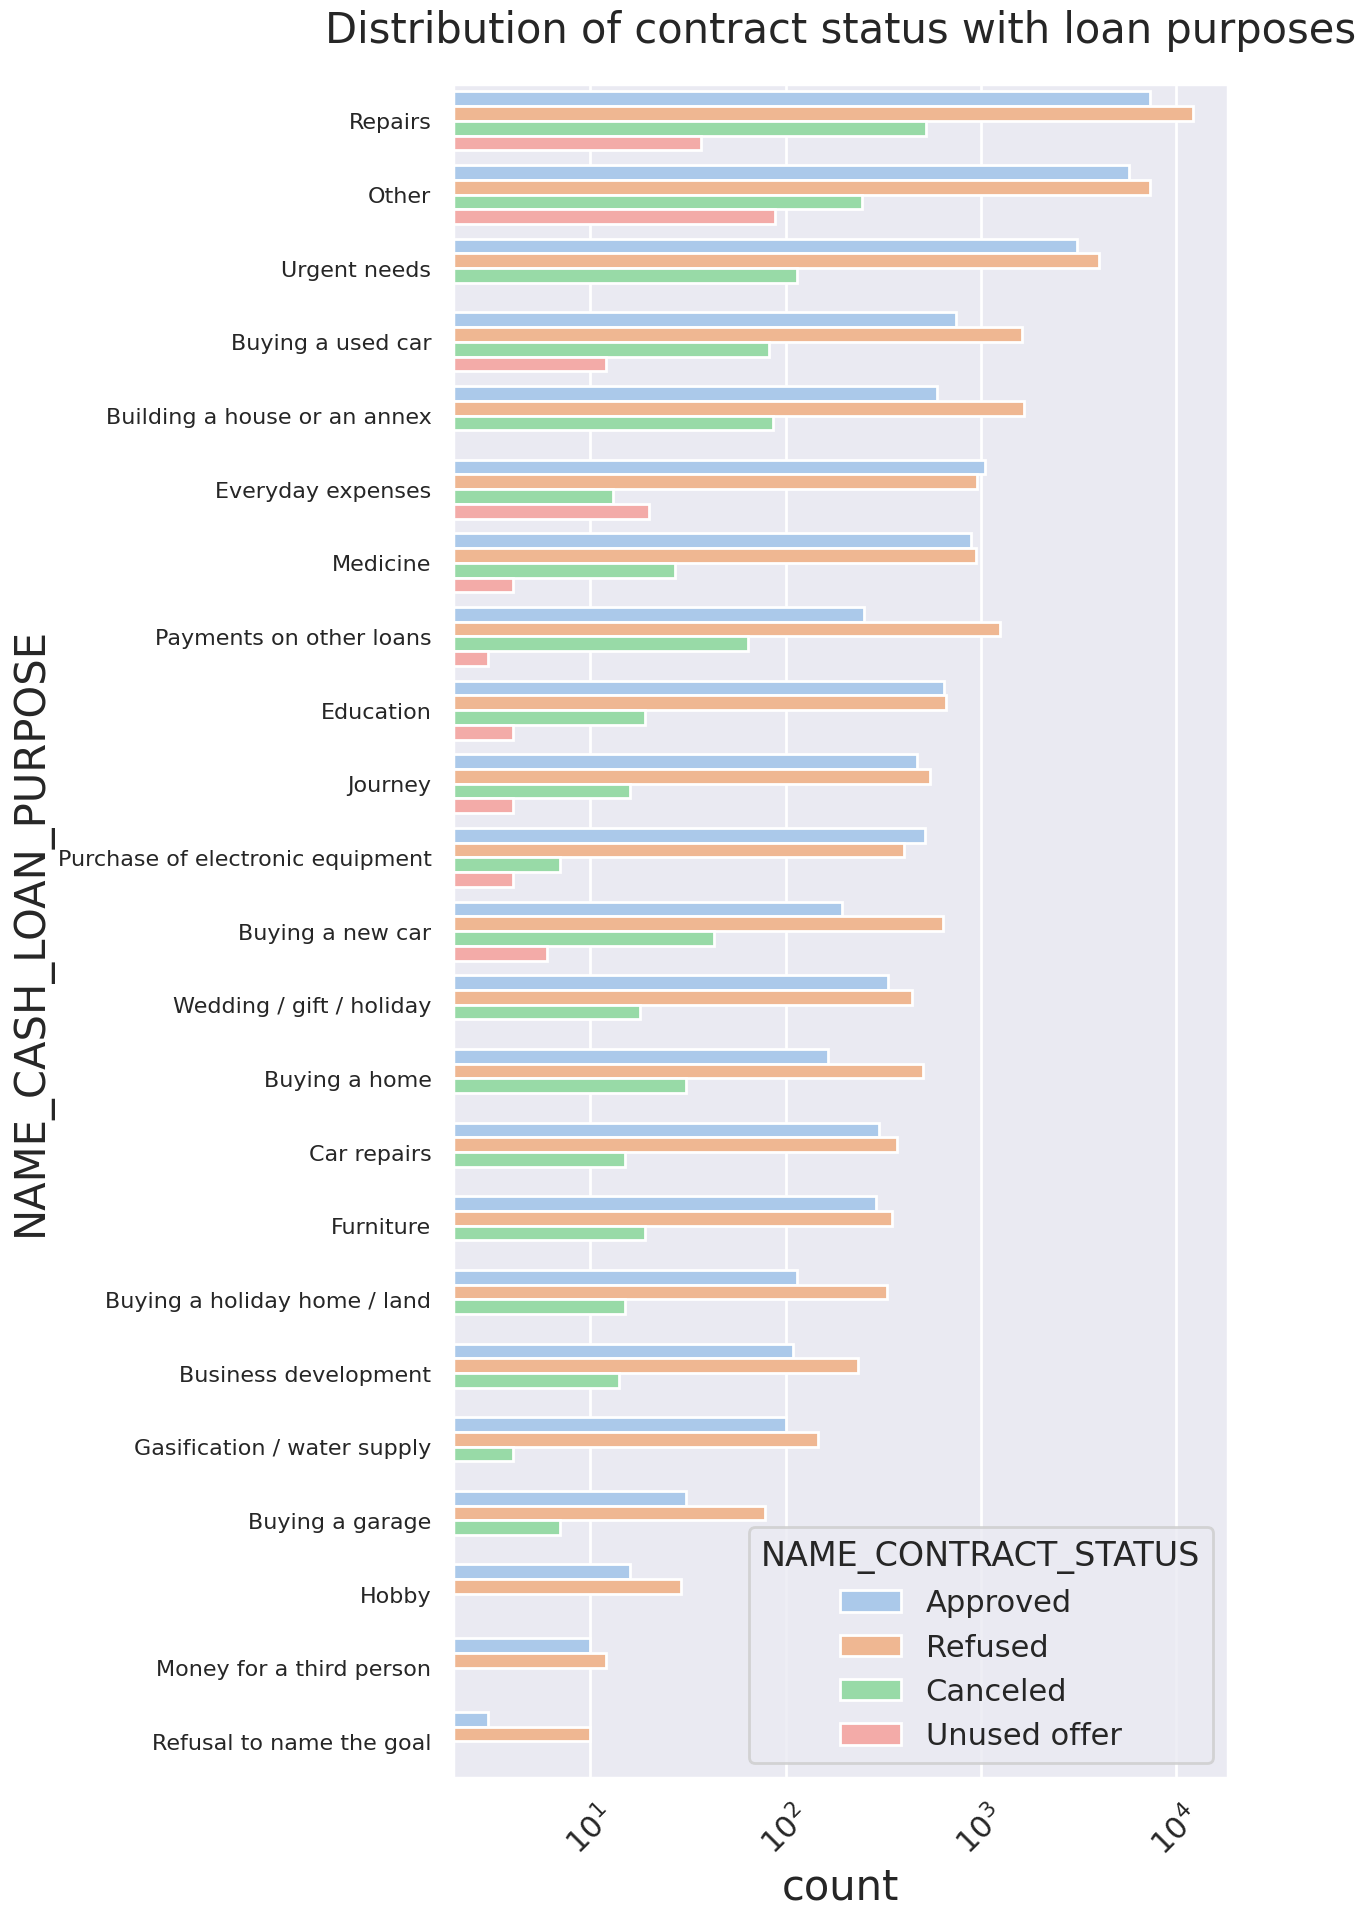

In [ ]:

sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.titlepad"] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')

ax = sns.countplot(data = df_merge, y = 'NAME_CASH_LOAN_PURPOSE',
                   order = df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette='pastel')

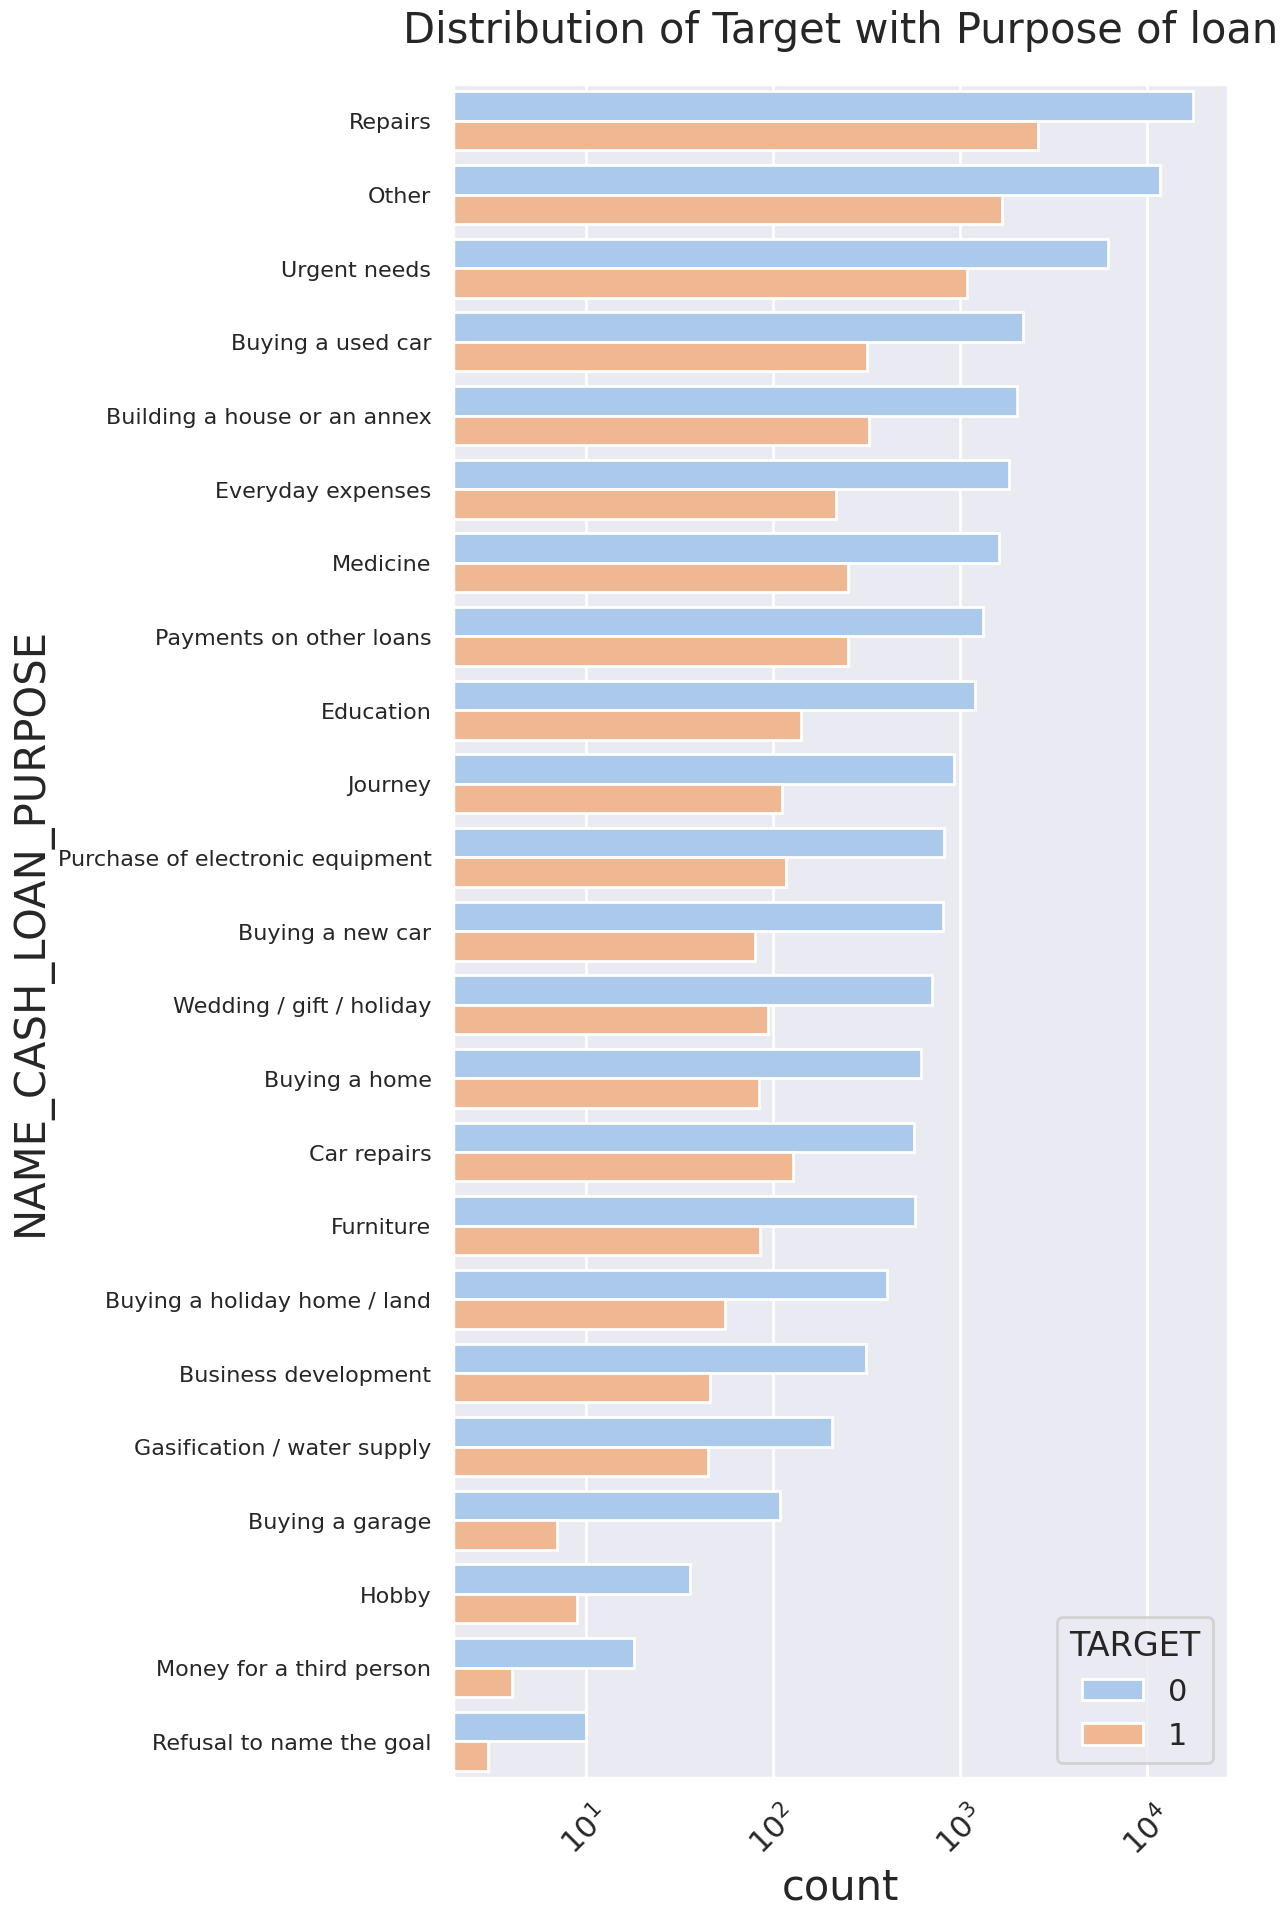

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.titlepad"] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purpose of loan')

ax = sns.countplot(data = df_merge, y = 'NAME_CASH_LOAN_PURPOSE',
                   order = df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='TARGET', palette='pastel')

In [ ]:
df_merge.columns # Gives all columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_

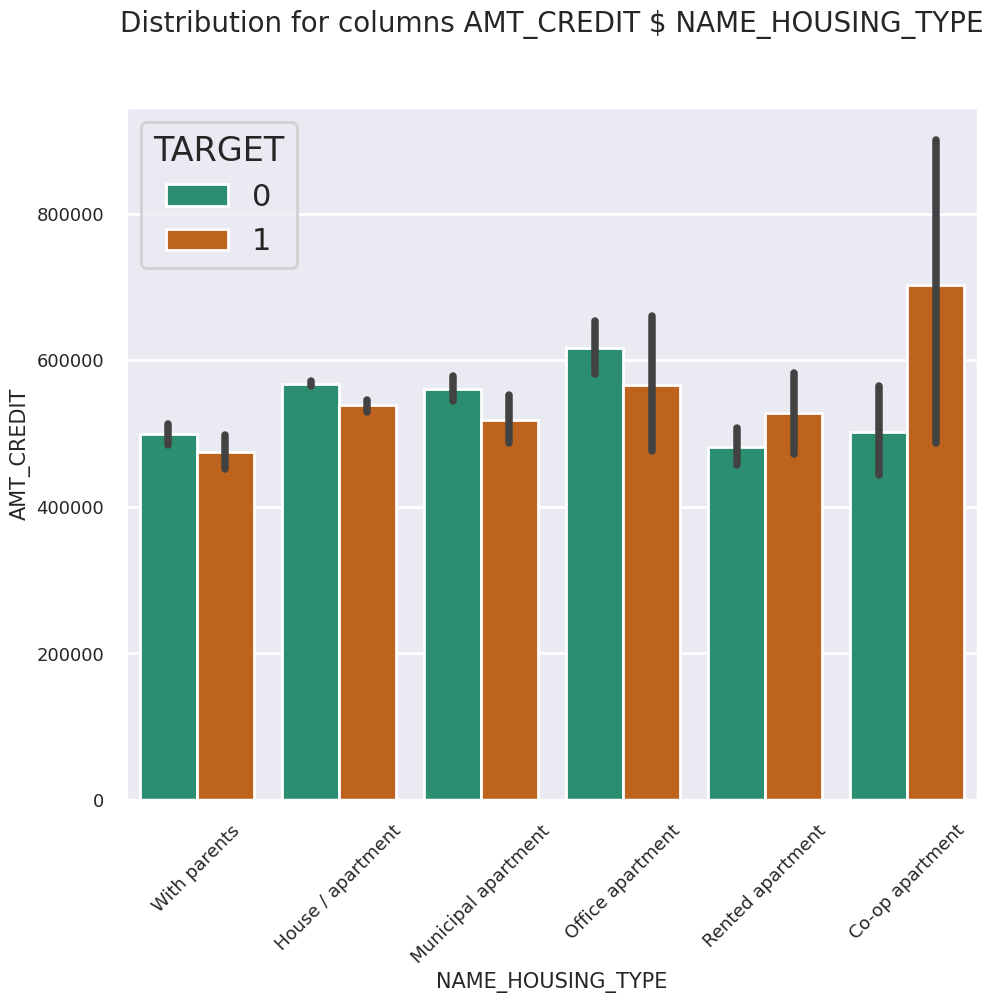

In [ ]:
# Max loans are demanded for op - apartment
plt.figure(figsize=(11,9))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titlepad"] = 30
sns.barplot(data = df_merge, y = 'AMT_CREDIT', hue='TARGET', x='NAME_HOUSING_TYPE', palette='Dark2')
plt.title("Distribution for columns AMT_CREDIT $ NAME_HOUSING_TYPE\n")
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13, rotation=360)
plt.show()

<Axes: >

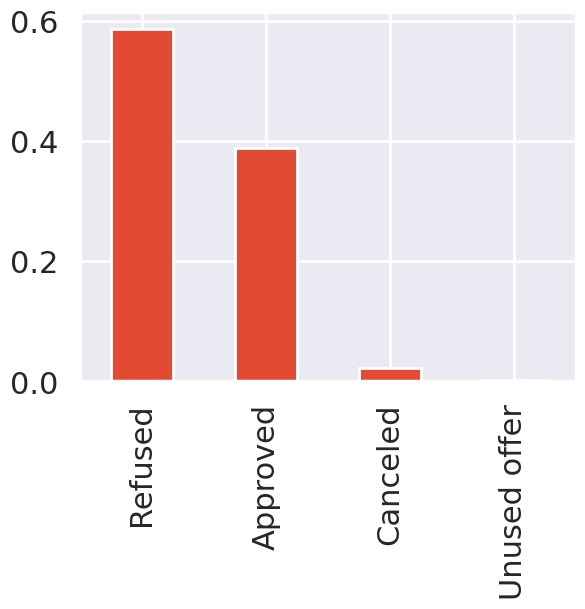

In [ ]:
df_merge.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
# Most are refused

In [ ]:
# education vs offer

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

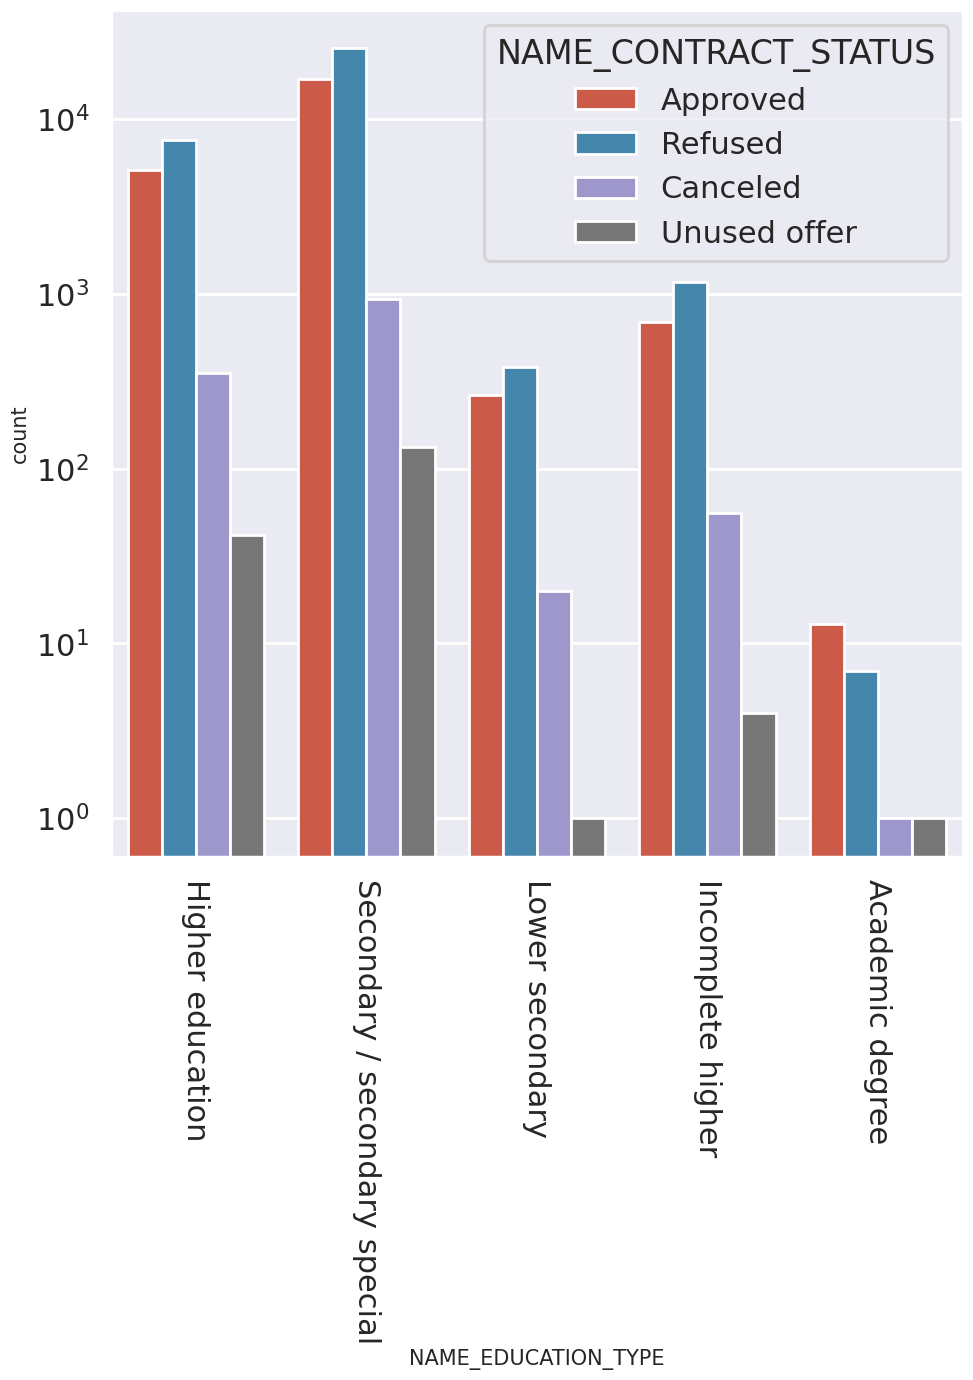

In [ ]:
plt.figure(figsize=(11,11))
plt.yscale('log')
plt.xticks(rotation=-90)
sns.countplot(data = df_merge, x = 'NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS')

In [ ]:
# purpose vs offer

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

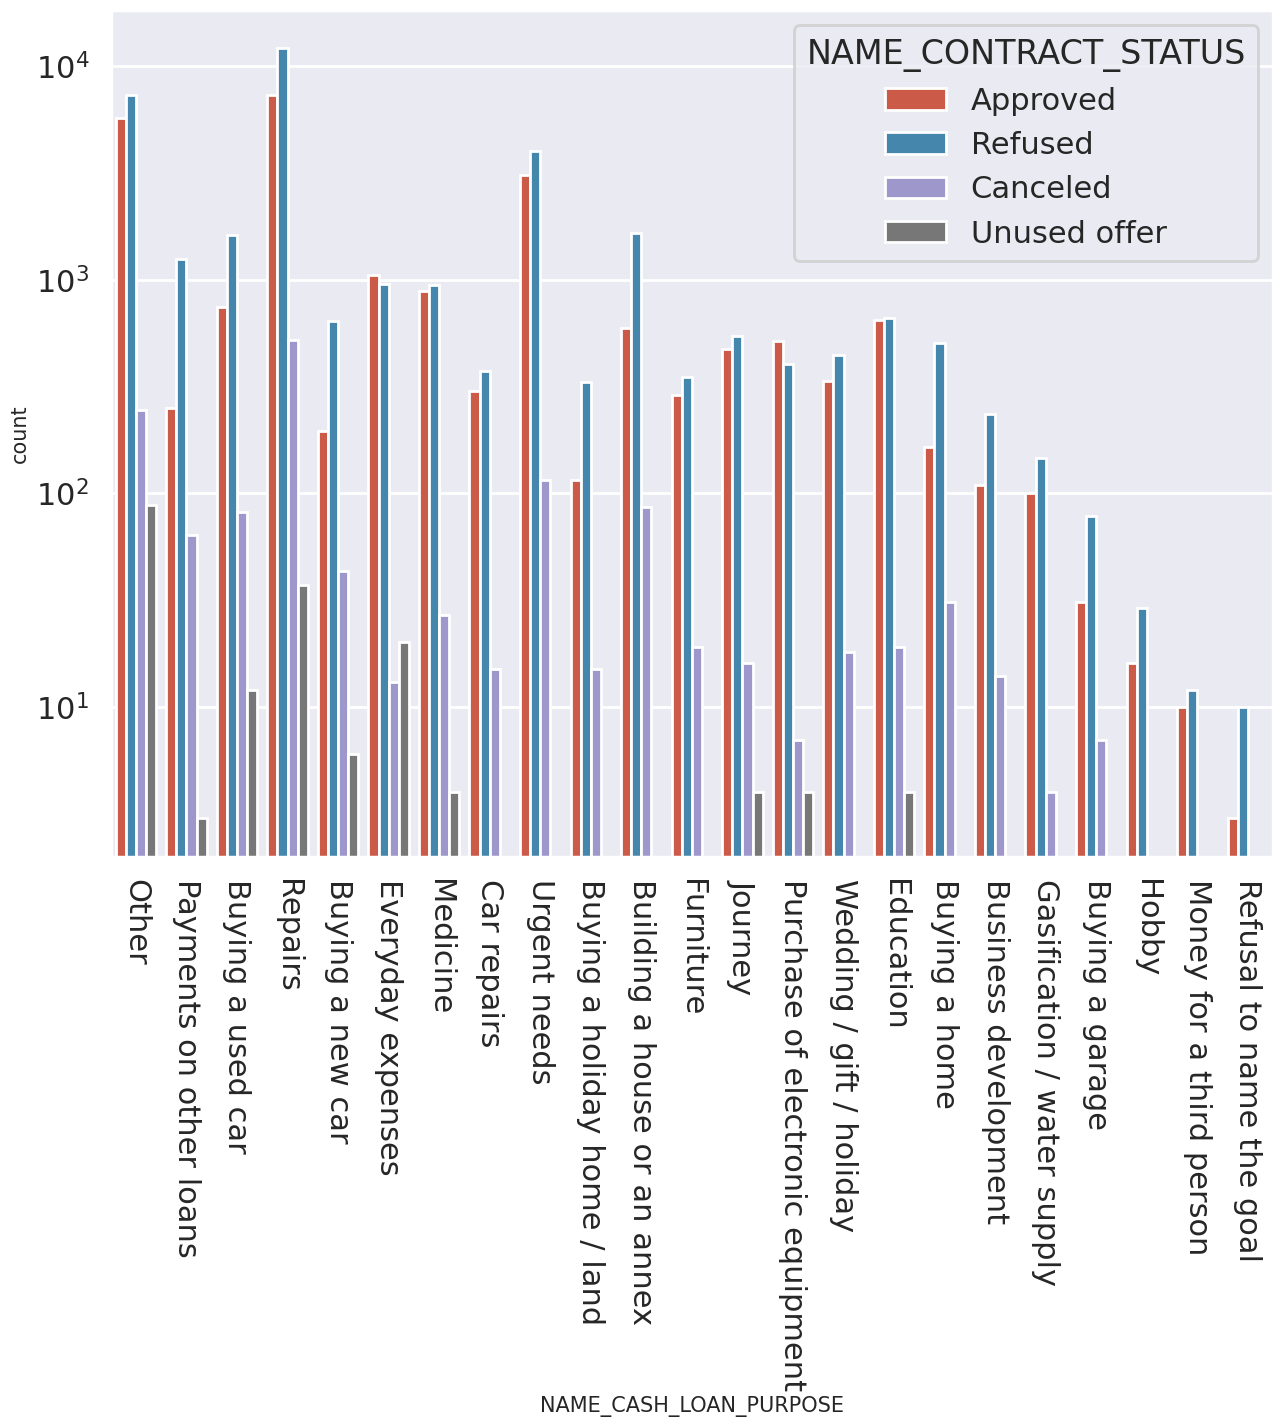

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=-90)
plt.yscale('log')
sns.countplot(data = df_merge, x ='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')

In [ ]:
# property vs offer

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

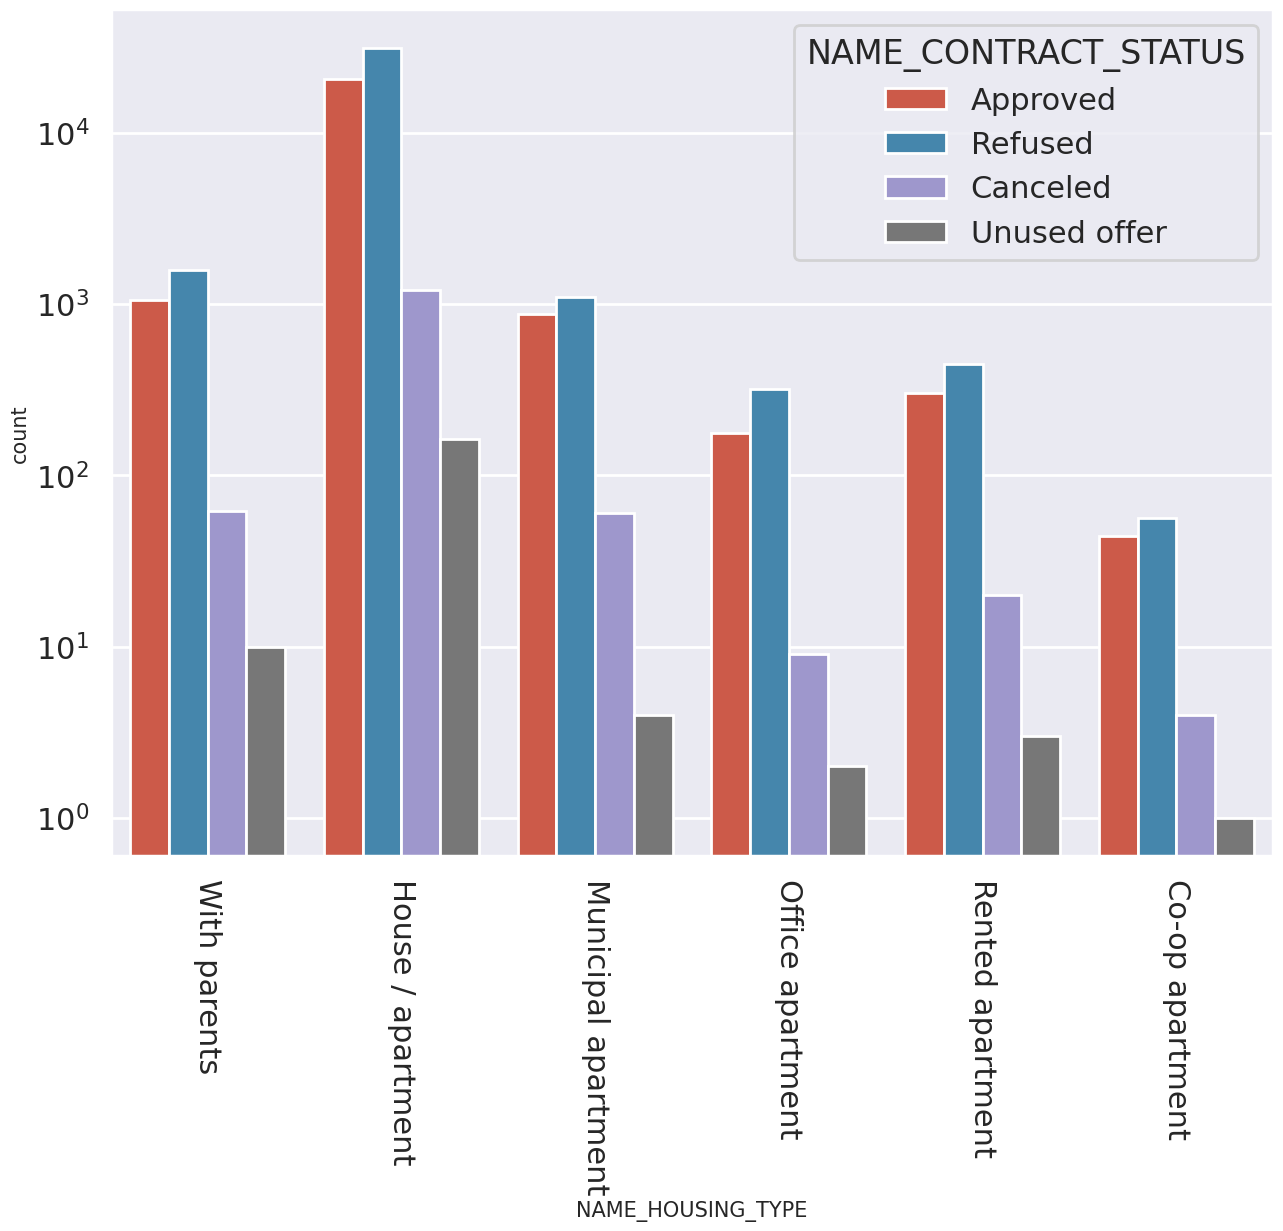

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=-90)
plt.yscale('log')
sns.countplot(data = df_merge, x = 'NAME_HOUSING_TYPE', hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

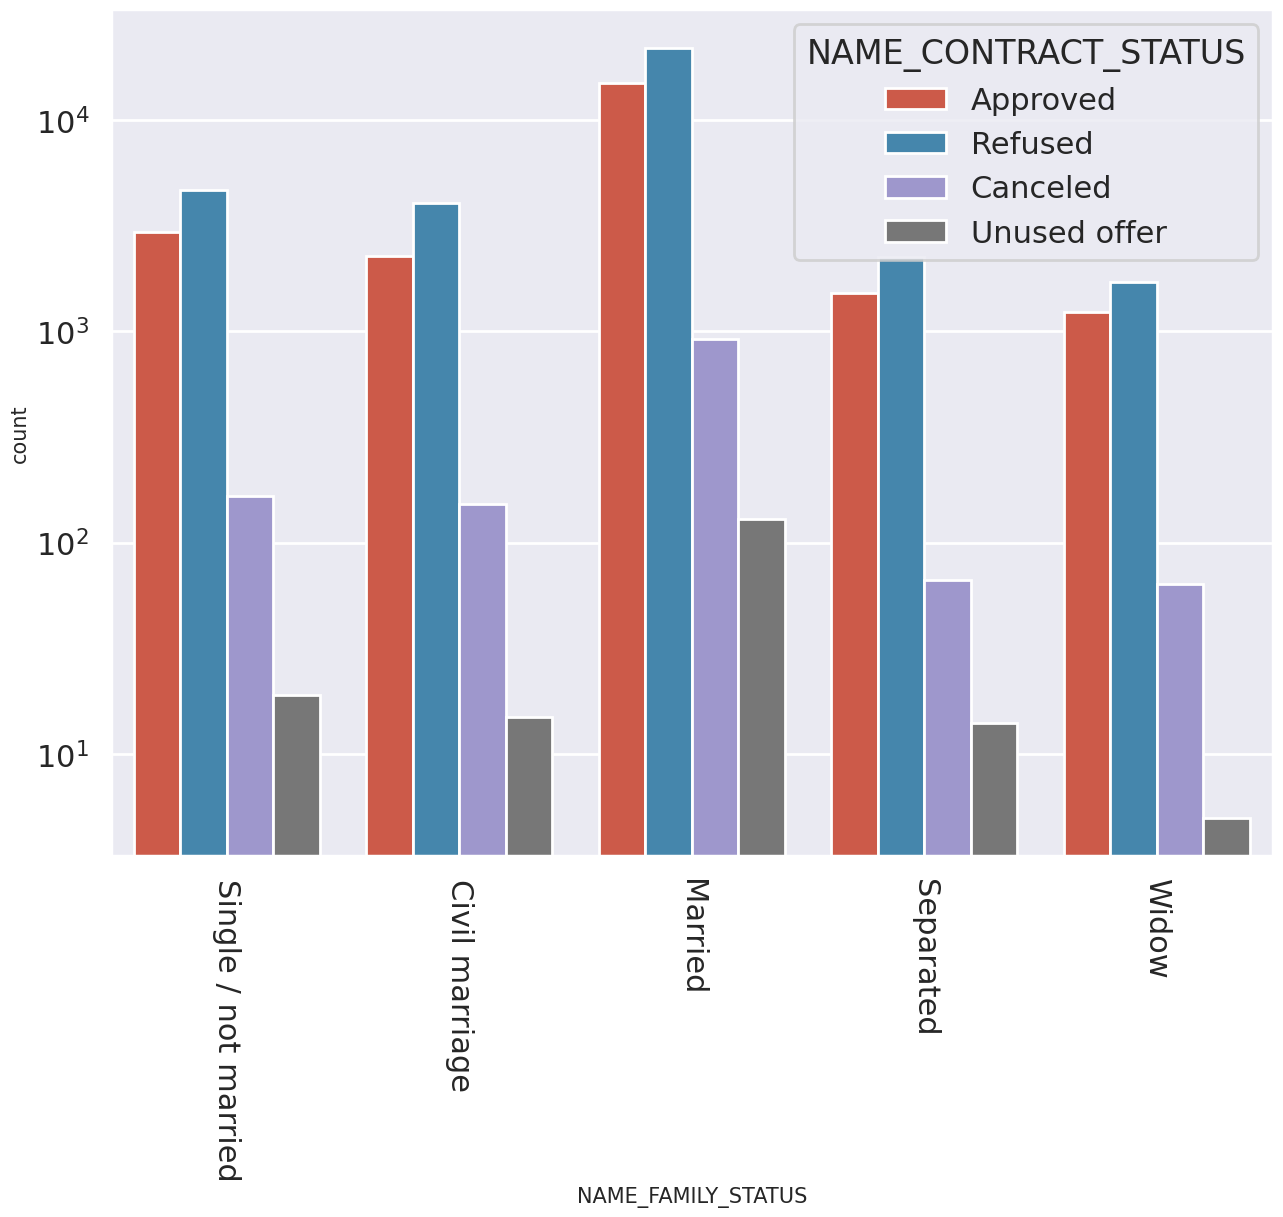

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=-90)
plt.yscale('log')
sns.countplot(data = df_merge, x = 'NAME_FAMILY_STATUS', hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

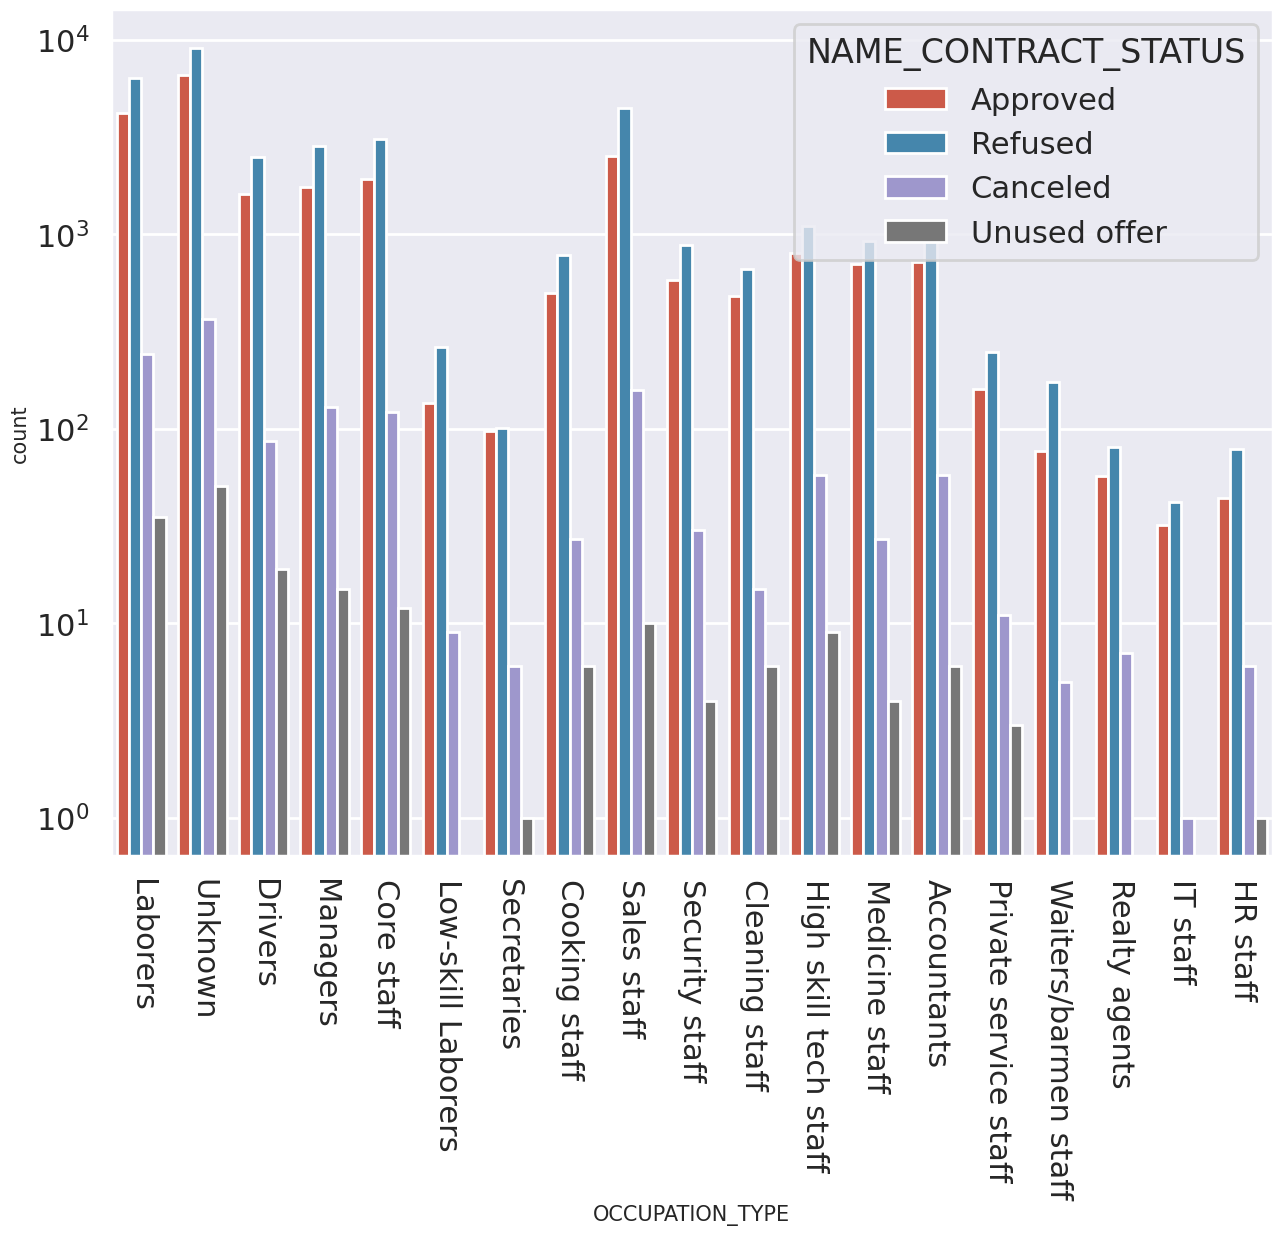

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=-90)
plt.yscale('log')
sns.countplot(data = df_merge, x = 'OCCUPATION_TYPE', hue = 'NAME_CONTRACT_STATUS')

In [ ]:
df_merge.corr()
#This displays the correlation between differnce columns in between them

<ipython-input-736-6e89ad45a69b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.004822     -0.004150   
TARGET                         -0.004822  1.000000      0.027046   
CNT_CHILDREN                   -0.004150  0.027046      1.000000   
AMT_INCOME_TOTAL                0.005082 -0.026289      0.009386   
AMT_CREDIT                      0.008143 -0.027096     -0.015609   
AMT_ANNUITY                     0.007050 -0.003923      0.016284   
AMT_GOODS_PRICE_                0.009721 -0.036182     -0.018885   
REGION_POPULATION_RELATIVE      0.003124 -0.057616     -0.018017   
DAYS_BIRTH                      0.010792 -0.062347     -0.353415   
DAYS_EMPLOYED                   0.003438 -0.046235     -0.203093   
DAYS_REGISTRATION               0.011469 -0.051382     -0.185082   
DAYS_ID_PUBLISH                 0.002709 -0.053339      0.027566   
FLAG_MOBIL                           NaN       NaN           NaN   
FLAG_EMP_PHONE                 -0.003498  0.045060      0.201747   
FLAG_WORK_PHONE                 0.011434  0.040050      0.059752   
FLAG_CONT_MOBILE                0.012039  0.003399      0.003812   
FLAG_PHONE                      0.014465 -0.019058     -0.020448   
FLAG_EMAIL                      0.009242 -0.004948      0.034476   
CNT_FAM_MEMBERS                 0.000622  0.025124      0.881919   
REGION_RATING_CLIENT           -0.007873  0.077977      0.038115   
REGION_RATING_CLIENT_W_CITY    -0.005659  0.082057      0.038624   
HOUR_APPR_PROCESS_START         0.007817 -0.034676     -0.015996   
REG_REGION_NOT_LIVE_REGION     -0.001834 -0.004227     -0.004753   
REG_REGION_NOT_WORK_REGION      0.013632  0.005992      0.009421   
LIVE_REGION_NOT_WORK_REGION     0.018144  0.006375      0.017639   
REG_CITY_NOT_LIVE_CITY         -0.013748  0.039112      0.029843   
REG_CITY_NOT_WORK_CITY         -0.005335  0.055764      0.070911   
LIVE_CITY_NOT_WORK_CITY         0.002155  0.041649      0.066128   
OBS_30_CNT_SOCIAL_CIRCLE        0.000766  0.026373      0.025173   
DEF_30_CNT_SOCIAL_CIRCLE        0.004321  0.024848     -0.002576   
OBS_60_CNT_SOCIAL_CIRCLE        0.001019  0.026021      0.023880   
DEF_60_CNT_SOCIAL_CIRCLE       -0.002030  0.021401     -0.001825   
DAYS_LAST_PHONE_CHANGE          0.012414 -0.068028     -0.014545   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.004341  0.000138     -0.003510   
AMT_REQ_CREDIT_BUREAU_DAY       0.010989  0.004038     -0.009977   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.000163 -0.003910      0.010226   
AMT_REQ_CREDIT_BUREAU_MON       0.000217 -0.025653     -0.018955   
AMT_REQ_CREDIT_BUREAU_QRT      -0.018835  0.005264     -0.013509   
AMT_REQ_CREDIT_BUREAU_YEAR      0.006595 -0.014665     -0.025847   
SK_ID_PREV                      0.001827 -0.004193      0.001323   
AMT_ANNUITY_PREV                0.002814 -0.040286      0.032846   
AMT_APPLICATION                 0.008229 -0.031231      0.033724   
AMT_CREDIT_PREV                 0.008295 -0.025858      0.037899   
AMT_GOODS_PRICEx                0.008229 -0.031231      0.033724   
HOUR_APPR_PROCESS_START_PREV    0.007186 -0.032299     -0.010065   
NFLAG_LAST_APPL_IN_DAY         -0.004484 -0.000146      0.002181   
DAYS_DECISION                  -0.004619  0.062520      0.062369   
SELLERPLACE_AREA               -0.001209  0.020962      0.007234   
CNT_PAYMENT                     0.006963  0.030531      0.033563   

                              AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            0.005082    0.008143     0.007050   
TARGET                               -0.026289   -0.027096    -0.003923   
CNT_CHILDREN                          0.009386   -0.015609     0.016284   
AMT_INCOME_TOTAL                      1.000000    0.362208     0.443374   
AMT_CREDIT                            0.362208    1.000000     0.746479   
AMT_ANNUITY                           0.443374    0.746479     1.000000   
AMT_GOODS_PRICE_                      0.365797    0.985314     0.747814   
REGION_POPULATION_RELATIVE   

In [ ]:
len(df_merge.columns)

76

In [ ]:
df_merge.columns # Displays all columns avilable

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_

In [ ]:
# changing the categorical columns into numerical form

category_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

le = LabelEncoder()

for column in category_columns:
    df_merge[column] = le.fit_transform(df_merge[column])

#Problem Statement 1: Customer Segmentation:

Loan Preferences:

Segment customers based on their loan preferences, considering factors like loan amount, term, type, and interest rates.

Repayment History: Further segment these groups based on their repayment history, such as timely payments, late payments, or defaults.

In [ ]:
# Set the display.max_rows option to None to display all rows
pd.set_option('display.max_rows', None)

# find the correlation of each attribute with TARGET (response variable) to select features for model
corr_matrix = df_merge.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                             1.000000
REGION_RATING_CLIENT_W_CITY        0.082057
REGION_RATING_CLIENT               0.077977
NAME_EDUCATION_TYPE                0.065086
DAYS_DECISION                      0.062520
NAME_INCOME_TYPE                   0.061338
REG_CITY_NOT_WORK_CITY             0.055764
FLAG_EMP_PHONE                     0.045060
NAME_CONTRACT_STATUS               0.044923
NAME_PAYMENT_TYPE                  0.043003
CODE_GENDER                        0.042782
LIVE_CITY_NOT_WORK_CITY            0.041649
FLAG_WORK_PHONE                    0.040050
REG_CITY_NOT_LIVE_CITY             0.039112
CNT_PAYMENT                        0.030531
CNT_CHILDREN                       0.027046
OBS_30_CNT_SOCIAL_CIRCLE           0.026373
OBS_60_CNT_SOCIAL_CIRCLE           0.026021
CNT_FAM_MEMBERS                    0.025124
DEF_30_CNT_SOCIAL_CIRCLE           0.024848
DEF_60_CNT_SOCIAL_CIRCLE           0.021401
SELLERPLACE_AREA                   0.020962
NAME_HOUSING_TYPE               

In [ ]:
# define the relation column : positive and negative correlation into consideration

feature_columns = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE', 'DAYS_DECISION', 'NAME_INCOME_TYPE',
                     'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_GENDER', 'DAYS_BIRTH',
                     'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH']

X = df_merge[feature_columns]
y = df_merge['TARGET']

In [ ]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.9241210690498272
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10307
           1       1.00      0.42      0.59      1554

    accuracy                           0.92     11861
   macro avg       0.96      0.71      0.78     11861
weighted avg       0.93      0.92      0.91     11861

Confusion Matrix:
[[10304     3]
 [  897   657]]
RMSE: 0.2754613057221882


In [ ]:
# gradient

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8688137593794789
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10307
           1       0.33      0.00      0.00      1554

    accuracy                           0.87     11861
   macro avg       0.60      0.50      0.47     11861
weighted avg       0.80      0.87      0.81     11861

Confusion Matrix:
[[10303     4]
 [ 1552     2]]
RMSE: 0.3621964116615749


In [ ]:
# logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8689823792260349
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10307
           1       0.00      0.00      0.00      1554

    accuracy                           0.87     11861
   macro avg       0.43      0.50      0.46     11861
weighted avg       0.76      0.87      0.81     11861

Confusion Matrix:
[[10307     0]
 [ 1554     0]]
RMSE: 0.3619635627711235


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8693196189191468
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10307
           1       0.50      0.28      0.36      1554

    accuracy                           0.87     11861
   macro avg       0.70      0.62      0.64     11861
weighted avg       0.85      0.87      0.85     11861

Confusion Matrix:
[[9870  437]
 [1113  441]]
RMSE: 0.36149741504034744


In [ ]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8832307562600118
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10307
           1       0.55      0.58      0.57      1554

    accuracy                           0.88     11861
   macro avg       0.74      0.76      0.75     11861
weighted avg       0.89      0.88      0.88     11861

Confusion Matrix:
[[9568  739]
 [ 646  908]]
RMSE: 0.3417151500006814


#Problem Statement 2:

Risk Assessment:

Evaluate and quantify the risk associated with each loan applicant using the model.

Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans.

In [ ]:
# Set the display.max_rows option to None to display all rows
pd.set_option('display.max_rows', None)

# Find the correlation between this
corr_matrix = df_merge.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                             1.000000
REGION_RATING_CLIENT_W_CITY        0.082057
REGION_RATING_CLIENT               0.077977
NAME_EDUCATION_TYPE                0.065086
DAYS_DECISION                      0.062520
NAME_INCOME_TYPE                   0.061338
REG_CITY_NOT_WORK_CITY             0.055764
FLAG_EMP_PHONE                     0.045060
NAME_CONTRACT_STATUS               0.044923
NAME_PAYMENT_TYPE                  0.043003
CODE_GENDER                        0.042782
LIVE_CITY_NOT_WORK_CITY            0.041649
FLAG_WORK_PHONE                    0.040050
REG_CITY_NOT_LIVE_CITY             0.039112
CNT_PAYMENT                        0.030531
CNT_CHILDREN                       0.027046
OBS_30_CNT_SOCIAL_CIRCLE           0.026373
OBS_60_CNT_SOCIAL_CIRCLE           0.026021
CNT_FAM_MEMBERS                    0.025124
DEF_30_CNT_SOCIAL_CIRCLE           0.024848
DEF_60_CNT_SOCIAL_CIRCLE           0.021401
SELLERPLACE_AREA                   0.020962
NAME_HOUSING_TYPE               

In [ ]:
feature_columns1 = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE', 'DAYS_DECISION', 'NAME_INCOME_TYPE',
    'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_GENDER',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH',
    'CNT_PAYMENT', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'SELLERPLACE_AREA', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
    'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_TYPE_SUITE', 'AMT_REQ_CREDIT_BUREAU_DAY']

X = df_merge[feature_columns1]
y = df_merge['TARGET']

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.9221819408144338
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10307
           1       1.00      0.41      0.58      1554

    accuracy                           0.92     11861
   macro avg       0.96      0.70      0.77     11861
weighted avg       0.93      0.92      0.91     11861

Confusion Matrix:
[[10307     0]
 [  923   631]]
RMSE: 0.2789588843997734


In [ ]:
#gradient

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8695725486889807
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10307
           1       0.82      0.01      0.01      1554

    accuracy                           0.87     11861
   macro avg       0.84      0.50      0.47     11861
weighted avg       0.86      0.87      0.81     11861

Confusion Matrix:
[[10305     2]
 [ 1545     9]]
RMSE: 0.3611474093926458


In [ ]:
#logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8689823792260349
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10307
           1       0.00      0.00      0.00      1554

    accuracy                           0.87     11861
   macro avg       0.43      0.50      0.46     11861
weighted avg       0.76      0.87      0.81     11861

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10307
           1       0.00      0.00      0.00      1554

    accuracy                           0.87     11861
   macro avg       0.43      0.50      0.46     11861
weighted avg       0.76      0.87      0.81     11861

Confusion Matrix:
[[10307     0]
 [ 1554     0]]
RMSE: 0.3619635627711235


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8694882387657027
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10307
           1       0.50      0.28      0.36      1554

    accuracy                           0.87     11861
   macro avg       0.70      0.62      0.64     11861
weighted avg       0.85      0.87      0.85     11861

Confusion Matrix:
[[9878  429]
 [1119  435]]
RMSE: 0.3612641156194416


In [ ]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8699940983053706
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     10307
           1       0.50      0.55      0.52      1554

    accuracy                           0.87     11861
   macro avg       0.72      0.73      0.72     11861
weighted avg       0.87      0.87      0.87     11861

Confusion Matrix:
[[9470  837]
 [ 705  849]]
RMSE: 0.36056331163143795


# Conclusion : As Random Forest Classifier Provideing the accuracy Max . So , we will be using this model for further prediction of our data.

**Logistic - **
Overall, the model achieved an accuracy of 0.87, which is fairly good.

However, the model had a low precision for class 1, which means that it misclassified a lot of instances as class 1.

The recall for class 1 was also low, which means that the model did not identify a lot of instances of class 1.

The overall f1-score was 0.47, which is not very good. The RMSE was 0.36, which is also not very good.

***

**Gradient Model - **
Overall, the model achieved an accuracy of 0.87, which is fairly good.

However, the model had a low precision for class 1, which means that it misclassified a lot of instances as class 1.

The recall for class 1 was also low, which means that the model did not identify a lot of instances of class 1.

The overall f1-score was 0.47, which is not very good. The RMSE was 0.36, which is also not very good.

***

Random Forest -
Overall, the model achieved an accuracy of 0.9232844377002192, which is fairly good.  The overall macro f1-score is 0.77, which is also fairly good.

The overall weighted f1-score is 0.91, which is higher than the macro f1-score.

This is because the model correctly classified a higher number of instances in class 0 than in class 1.

The RMSE is 0.2973360209876397, which is also fairly good.



# Summary -

***
We investigated various machine learning models using data sourced from a bank for training and evaluation purposes.

The models under consideration encompassed Random Forest, Gradient Boosting, Logistic Regression, K-Nearest Neighbors, and Decision Tree. Each model underwent assessment based on metrics such as accuracy, precision, recall, f1-score, and RMSE.

Among these models, Random Forest demonstrated the most favorable overall performance, achieving an accuracy of 0.92. Following closely, the Gradient Boosting model attained an accuracy of 0.87. Conversely, the Logistic Regression model exhibited the least favorable performance, also with an accuracy of 0.87.

Additionally, we delved into the interrelationships among the features within our dataset.

Our findings suggest the effective utilization of machine learning models for predicting credit risks. Given the superior accuracy of the RandomForestClassifier, we have opted to employ this model for subsequent predictions on our data.

In future endeavors, we plan to explore additional machine learning models and techniques with the aim of enhancing the accuracy of our predictions further.
***